# Cedit Card Fraud Detection Project

#### Project Objective:

The dataset provided by [Capital One Sythetic Card transaction data]('https://github.com/CapitalOneRecruiting/DS/raw/master/transactions.zip) will assist in building a machine learning model to predict credit card fraud. <br>
       •	Identify characteristics that accompanies fraudulent activity. <br>
       •	Use Classification Models (Logistics Regression, Decision Trees, K-Means) <br>
       •	Insights on the output <br>
<br>

**Method of Analysis:** <br>

1.	The project’s objective, method of analysis, explanation of the dataset (including independent and dependent variables) and column descriptions.
2.	Cleaning data for any duplications and missing values
3.	Descriptive Statistics
4.	Visualizations
>a.	Histogram = Numeric column<br>
b.	Bar Chart = Categorical Column<br>
c.	Scatter Plot = Any 2 Numeric Columns
5.	Outlier Analysis
6.	Regenerate Descriptive Statistics
7.  Model Design for Fraud detection
8. Corelation Analysis
8.  Dealing with Class Imbalance
9. ML Models(Logistic Regression, Random Forest, SVM)


**Dataset Explanation:** <br>

`accountNumber`: Unique Account Number<br>

`customerId`: Unique Customer ID<br>                     
`creditLimit`: Maximum Credit Card Dollar Amount<br>                     
`availableMoney`: Usable Credit Card Dollar Amount<br>                  
`transactionDateTime`: The Date and Time the transaction occurred<br>             
`transactionAmount`: The dollar amount of the transaction<br>              
`merchantName`: Where the purchased occured<br>                 
`acqCountry`: The country the transaction occured<br>

`merchantCountryCode`: The country where the merchant belongs too<br>   
`posEntryMode`: Two digit code identifies the actual method used to enter the cardholer account number and card expiration date<br>             
`posConditionCode`: Identify transaction conditon at the point-of-sale or point-of-service<br>              
`merchantCategoryCode`: Purchase category of the merchant <br> 

`currentExpDate`: Expiration Date of the Credit Card <br>                   
`accountOpenDate`: Date the Credit Card Opened <br>               
`dateOfLastAddressChange`: Last Time Credit Card Holder’s Address Changed <br>         
`cardCVV`: Security Code of the Credit Card <br>                         
`enteredCVV`: Security Code Received <br>                      
`cardLast4Digits`: Last 4 digits of Credit Card number <br>                 
`transactionType`: Purchase, Return, etc <br>              
`echoBuffer`: N/A (all values are blank in the dataset)<br>      
`currentBalance`: Balance on the Credit Card <br>                  
`merchantCity`: City of Merchant<br>                
`merchantState`: State of Merchant<br>             
`merchantZip`: Zip Code of Merchant<br>      
`cardPresent`: Was the card physically existed during the time of the transaction. <br>                     
`posOnPremises`: N/A (all values are blank in the dataset)<br>           
`recurringAuthInd`: N/A (all values are blank in the dataset)<br>    
`expirationDateKeyInMatch`: Expire Date matches with the system<br>        
`isFraud`: Classification Target Attribute <br>                  

### Loading Libraries

In [65]:
import pyspark.pandas as ps
import matplotlib.pyplot as plt
ps.set_option('plotting.backend', 'matplotlib')
from pyspark.sql import functions as F
from pyspark.sql.window import Window

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Loading Dataset

In [66]:
# loading the dataset stored in S3
transaction_data = ps.read_csv('s3://gba6430-project/transaction_data.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt/yarn/usercache/livy/appcache/application_1691080712159_0001/container_1691080712159_0001_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

In [67]:
# checking the shape of the dataset
transaction_data.shape

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(786363, 30)

**Explaination:** The shape of the dataset shows that it has 30 varaiables with 786,363 observations

In [68]:
# look at the top 5 records of the dataset
transaction_data.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   _c0  accountNumber  customerId  creditLimit  availableMoney transactionDateTime  transactionAmount         merchantName acqCountry merchantCountryCode  posEntryMode  posConditionCode merchantCategoryCode currentExpDate accountOpenDate dateOfLastAddressChange  cardCVV  enteredCVV  cardLast4Digits transactionType echoBuffer  currentBalance merchantCity merchantState merchantZip  cardPresent posOnPremises recurringAuthInd  expirationDateKeyInMatch  isFraud
0    0      737265056   737265056         5000          5000.0 2016-08-13 14:27:32              98.55                 Uber         US                  US             2                 1            rideshare        06/2023      2015-03-14              2015-03-14      414         414             1803        PURCHASE       None             0.0         None          None        None        False          None             None                     False    False
1    1      737265056   737265056         5000          5000.0 2016-10-11 05:0

In [69]:
# dataframe details
transaction_data.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   _c0                       786363 non-null  int32         
 1   accountNumber             786363 non-null  int32         
 2   customerId                786363 non-null  int32         
 3   creditLimit               786363 non-null  int32         
 4   availableMoney            786363 non-null  float64       
 5   transactionDateTime       786363 non-null  datetime64[ns]
 6   transactionAmount         786363 non-null  float64       
 7   merchantName              786363 non-null  object        
 8   acqCountry                781801 non-null  object        
 9   merchantCountryCode       785639 non-null  object        
 10  posEntryMode              782309 non-null  int32         
 11  posConditionCode          785954 non-null  int32         
 12 

**Explaination:** There are 6 columns that shows that they are completely empty. (echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises, and recurringAuthInd). This issue will be dealt with in the data cleaning section.

In [70]:
# drop the first index column "_c0"
transaction_data = transaction_data.drop(columns= ['_c0'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

**Explaination:** This column is being dropped because it shows the index of the dataset which is not required.

In [71]:
# shows the descriptive statistics of the numerical columns in the dataset
transaction_data.describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       accountNumber    customerId   creditLimit  availableMoney         transactionDateTime  transactionAmount  posEntryMode  posConditionCode             accountOpenDate     dateOfLastAddressChange       cardCVV     enteredCVV  cardLast4Digits  currentBalance
count   7.863630e+05  7.863630e+05  786363.00000   786363.000000                      786363      786363.000000  782309.00000     785954.000000                      786363                      786363  786363.00000  786363.000000     786363.00000   786363.000000
mean    5.372326e+08  5.372326e+08   10759.00000     6250.725369  2016-07-06 01:58:58.395681         136.985791       9.00000          3.000000  2014-02-03 01:11:17.352825  2015-04-14 06:46:41.127723     544.00000     544.000000       4757.00000     4508.739089
min     1.000881e+08  1.000881e+08     250.00000    -1005.630000         2016-01-01 00:01:02           0.000000       2.00000          1.000000         1989-08-22 00:00:00         1989-08-22 00:00:00     100.00000 

### Data Cleaning 

Checking for duplicate rows using the unique and count functions. Verified that the data doesn't have any duplicate rows.

In [72]:
# Checking for duplicate rows 
print(transaction_data.shape, transaction_data.to_spark().distinct().count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(786363, 29) 786363
/mnt/yarn/usercache/livy/appcache/application_1691080712159_0001/container_1691080712159_0001_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

**Explaination:** The dataset does not contain any duplicate rows

In [73]:
#count the number of missing values in each column
x = transaction_data.isna().sum(axis = 0)
x.sort_values(ascending = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

echoBuffer                  786363
merchantCity                786363
merchantState               786363
merchantZip                 786363
posOnPremises               786363
recurringAuthInd            786363
acqCountry                    4562
posEntryMode                  4054
merchantCountryCode            724
transactionType                698
posConditionCode               409
accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
currentBalance                   0
cardPresent                      0
expirationDateKeyInMatch         0
isFraud             

In [74]:
#count percentage of missing values in each column
transaction_data.isna().sum(axis=0)/transaction_data.shape[0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

accountNumber               0.000000
customerId                  0.000000
creditLimit                 0.000000
availableMoney              0.000000
transactionDateTime         0.000000
transactionAmount           0.000000
merchantName                0.000000
acqCountry                  0.005801
merchantCountryCode         0.000921
posEntryMode                0.005155
posConditionCode            0.000520
merchantCategoryCode        0.000000
currentExpDate              0.000000
accountOpenDate             0.000000
dateOfLastAddressChange     0.000000
cardCVV                     0.000000
enteredCVV                  0.000000
cardLast4Digits             0.000000
transactionType             0.000888
echoBuffer                  1.000000
currentBalance              0.000000
merchantCity                1.000000
merchantState               1.000000
merchantZip                 1.000000
cardPresent                 0.000000
posOnPremises               1.000000
recurringAuthInd            1.000000
e

**Explaination:** This shows that the 6 columns (echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises, and recurringAuthInd) that was mentioned above has all values empty. Will be dropping the columns in the next line of code.

In [75]:
# drop columns with 100% values missing
transaction_data = transaction_data.drop(columns= ['echoBuffer','merchantCity','merchantState','merchantZip',
                                                   'posOnPremises','recurringAuthInd'])
# count percentage of missing values in each column
transaction_data.isna().sum(axis=0)/transaction_data.shape[0]


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

accountNumber               0.000000
customerId                  0.000000
creditLimit                 0.000000
availableMoney              0.000000
transactionDateTime         0.000000
transactionAmount           0.000000
merchantName                0.000000
acqCountry                  0.005801
merchantCountryCode         0.000921
posEntryMode                0.005155
posConditionCode            0.000520
merchantCategoryCode        0.000000
currentExpDate              0.000000
accountOpenDate             0.000000
dateOfLastAddressChange     0.000000
cardCVV                     0.000000
enteredCVV                  0.000000
cardLast4Digits             0.000000
transactionType             0.000888
currentBalance              0.000000
cardPresent                 0.000000
expirationDateKeyInMatch    0.000000
isFraud                     0.000000
dtype: float64

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

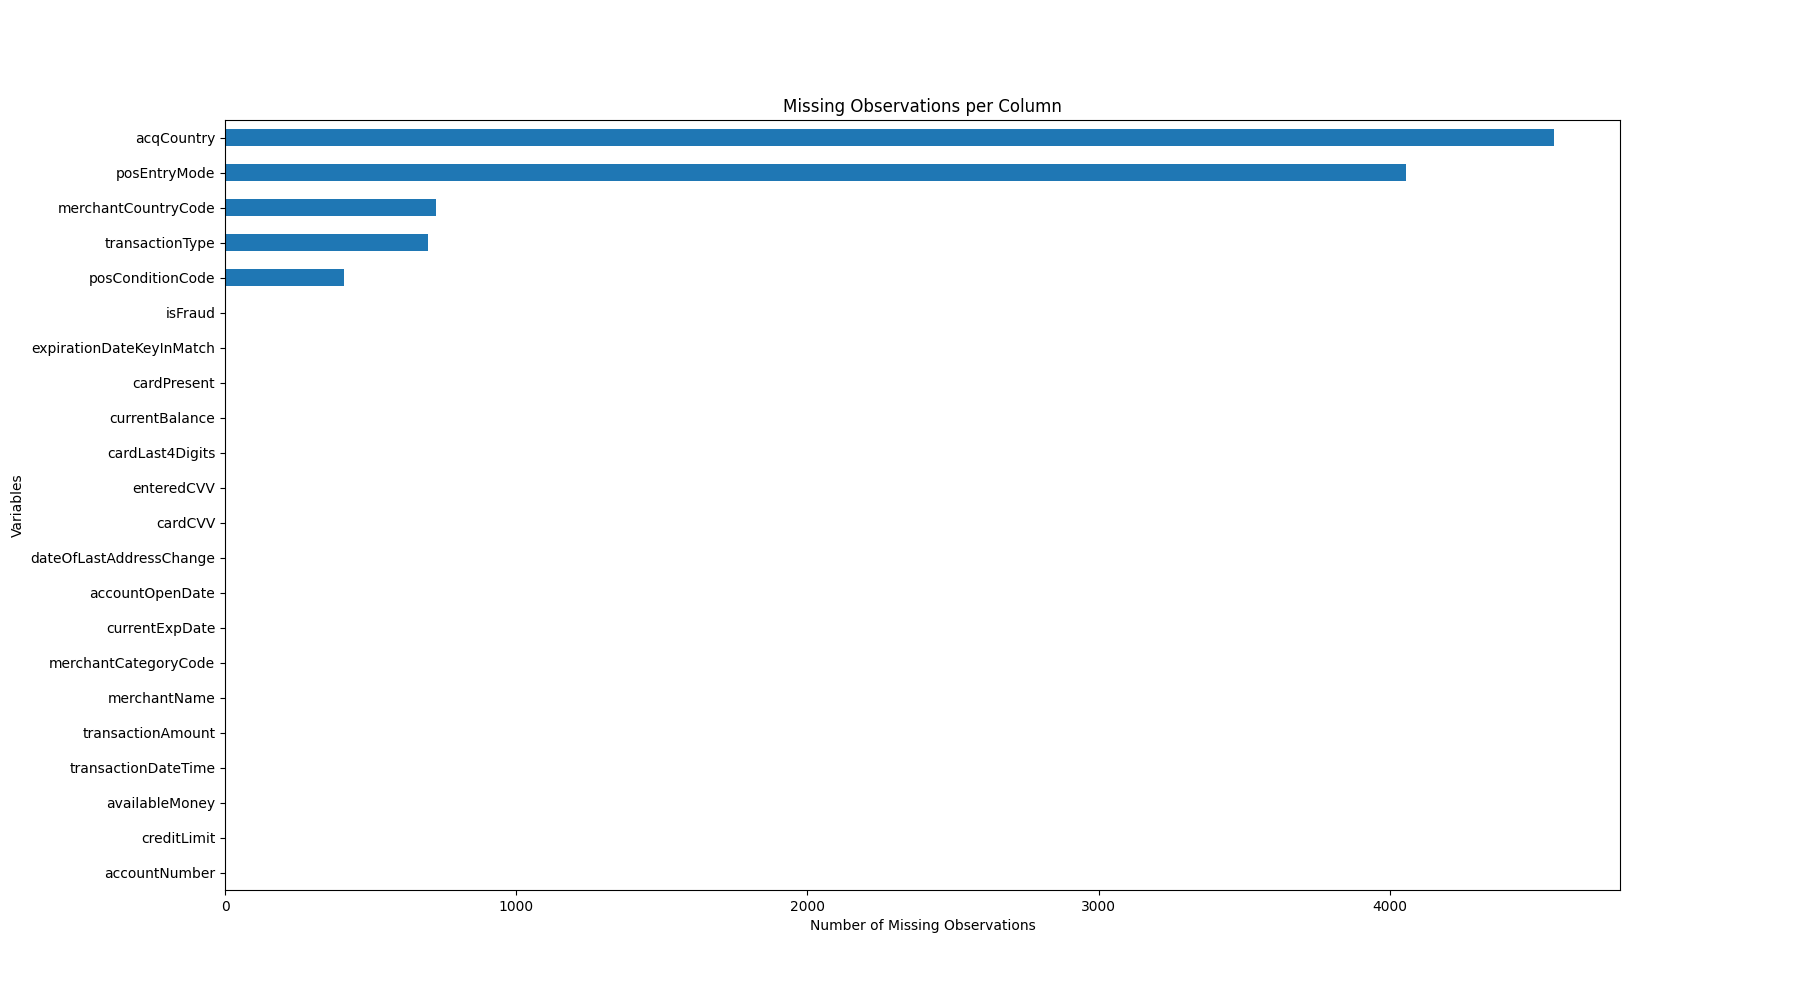

In [76]:
# visually plotting the missing observations
plt.clf()
plt.figure(figsize=(18, 10))
transaction_data.set_index('customerId').isna().sum(axis=0).sort_values(ascending=True).plot.barh()
plt.title('Missing Observations per Column')
plt.xlabel('Number of Missing Observations')
plt.ylabel('Variables')
%matplot plt

### Descriptive Statistics and Visualizations (Part 1)

In [77]:
# Printing the shape of dataset
"Dataset Dimensions: {}x{}".format(transaction_data.shape[0], transaction_data.shape[1])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Dataset Dimensions: 786363x23'

In [78]:
# Total unique accountsof the dataset:
"Total unique accounts: {}".format(len(transaction_data['accountNumber'].unique()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Total unique accounts: 5000'

In [79]:
"Total unique transactions based on transaction amount: {}".format(len(transaction_data['transactionAmount'].unique()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Total unique transactions based on transaction amount: 66038'

In [80]:
# shows the descriptive statistics with the 6 columns dropped
transaction_data.describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       accountNumber    customerId   creditLimit  availableMoney         transactionDateTime  transactionAmount  posEntryMode  posConditionCode             accountOpenDate     dateOfLastAddressChange       cardCVV     enteredCVV  cardLast4Digits  currentBalance
count   7.863630e+05  7.863630e+05  786363.00000   786363.000000                      786363      786363.000000  782309.00000     785954.000000                      786363                      786363  786363.00000  786363.000000     786363.00000   786363.000000
mean    5.372326e+08  5.372326e+08   10759.00000     6250.725369  2016-07-06 01:58:58.395681         136.985791       9.00000          3.000000  2014-02-03 01:11:17.352825  2015-04-14 06:46:41.127723     544.00000     544.000000       4757.00000     4508.739089
min     1.000881e+08  1.000881e+08     250.00000    -1005.630000         2016-01-01 00:01:02           0.000000       2.00000          1.000000         1989-08-22 00:00:00         1989-08-22 00:00:00     100.00000 

In [81]:
cases = len(transaction_data)
nonfraud_count = len(transaction_data[transaction_data.isFraud == 'False'])
fraud_count = len(transaction_data[transaction_data.isFraud == 'True'])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('CASE COUNT:')
print('--------------------------------------------')
print('Total number of cases are {}'.format(cases))
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Number of fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}'.format(fraud_percentage))
print('--------------------------------------------')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

CASE COUNT:
--------------------------------------------
Total number of cases are 786363
Number of Non-fraud cases are 773946
Number of fraud cases are 12417
Percentage of fraud cases is 1.6
--------------------------------------------

**Explaination:** Out of the total 786,363 cases, 12,417 cases are identified as fraud transactions, accounting for approximately 1.6% of the dataset.

In [82]:
# Creating subsets of the dataframe to compare statistics of fraud and non-fraud cases:
nonfraud_cases = transaction_data[transaction_data.isFraud == False]
fraud_cases = transaction_data[transaction_data.isFraud == True]

print('CASE TRANSACTION AMOUNT STATISTICS')
print('--------------------------------------------')
print('NON-FRAUD CASE TRANSACTION AMOUNT STATS')
print(nonfraud_cases.transactionAmount.describe())
print('--------------------------------------------')
print('FRAUD CASE TRANSACTION AMOUNT STATS')
print(fraud_cases.transactionAmount.describe())
print('--------------------------------------------')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

CASE TRANSACTION AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE TRANSACTION AMOUNT STATS
count    773946.000000
mean        135.570249
std         146.525305
min           0.000000
25%          33.180000
50%          86.750000
75%         189.370000
max        2011.540000
Name: transactionAmount, dtype: float64
--------------------------------------------
FRAUD CASE TRANSACTION AMOUNT STATS
count    12417.000000
mean       225.215905
std        189.551393
min          0.000000
25%         85.920000
50%        176.970000
75%        311.210000
max       1608.350000
Name: transactionAmount, dtype: float64
--------------------------------------------

**Explaination:** The descriptive statistics of transaction amount indicate that, on average, fraud transactions have higher amounts compared to non-fraud transactions.

In [83]:
# CASE CREDIT LIMIT STATISTICS
print('CASE CREDIT LIMIT STATISTICS')
print('--------------------------------------------')
print('NON-FRAUD CASE CREDIT LIMITT STATS')
print(nonfraud_cases.creditLimit.describe())
print('--------------------------------------------')
print('FRAUD CASE CREDIT LIMIT STATS')
print(fraud_cases.creditLimit.describe())
print('--------------------------------------------')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

CASE CREDIT LIMIT STATISTICS
--------------------------------------------
NON-FRAUD CASE CREDIT LIMITT STATS
count    773946.000000
mean      10754.884062
std       11631.136963
min         250.000000
25%        5000.000000
50%        7500.000000
75%       15000.000000
max       50000.000000
Name: creditLimit, dtype: float64
--------------------------------------------
FRAUD CASE CREDIT LIMIT STATS
count    12417.000000
mean     11044.958525
std      11943.007883
min        250.000000
25%       5000.000000
50%       7500.000000
75%      15000.000000
max      50000.000000
Name: creditLimit, dtype: float64
--------------------------------------------

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

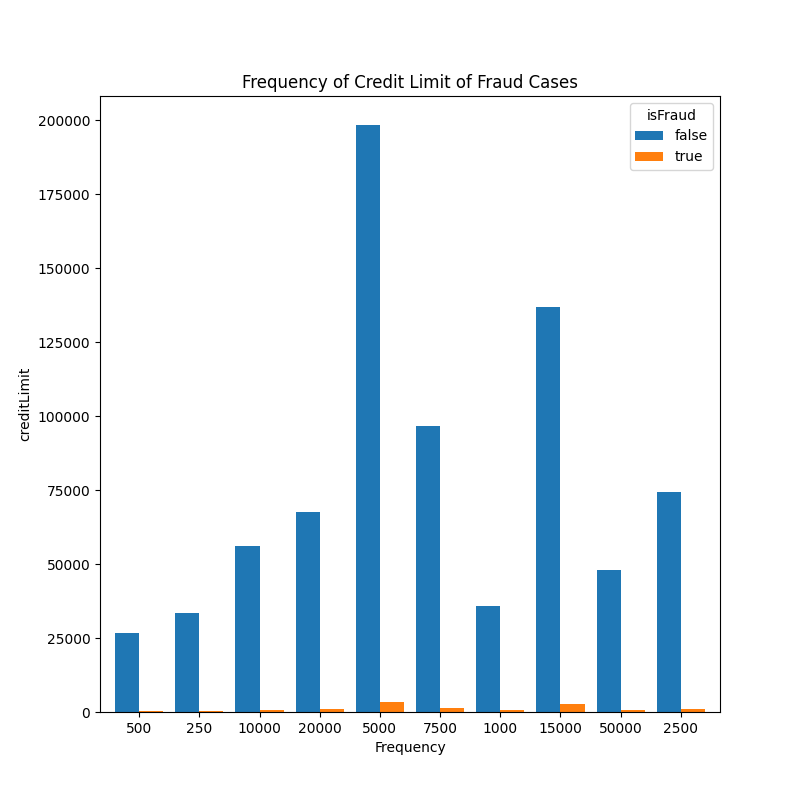

In [84]:
# Bar chart of Fraud frequency of the data

credit_limit_counts = transaction_data.groupby('isFraud').creditLimit.value_counts().unstack(0)

# Plot the bar chart
ax = credit_limit_counts.plot.bar(figsize=(8, 8), width=0.8)
ax.set_ylabel('creditLimit')
ax.set_xlabel('Frequency')
ax.title.set_text('Frequency of Credit Limit of Fraud Cases')
plt.xticks(rotation=0)
plt.show()
%matplot plt

**Explaination:** The average credit limit for fraud cases is higher than that of non-fraud cases, likely due to the fact that fraud cases constitute only a small percentage of the data.

In [85]:
print('CASE AVAILABLE MONEY STATISTICS')
print('--------------------------------------------')
print('NON-FRAUD CASE AVAILABLE MONEY STATS')
print(nonfraud_cases.availableMoney.describe())
print('--------------------------------------------')
print('FRAUD CASE AVAILABLE MONEY STATS')
print(fraud_cases.availableMoney.describe())
print('--------------------------------------------')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

CASE AVAILABLE MONEY STATISTICS
--------------------------------------------
NON-FRAUD CASE AVAILABLE MONEY STATS
count    773946.000000
mean       6252.455386
std        8883.600096
min       -1005.630000
25%        1077.360000
50%        3185.310000
75%        7500.000000
max       50000.000000
Name: availableMoney, dtype: float64
--------------------------------------------
FRAUD CASE AVAILABLE MONEY STATS
count    12417.000000
mean      6142.894186
std       8703.131117
min       -614.390000
25%       1078.020000
50%       3120.590000
75%       7500.000000
max      50000.000000
Name: availableMoney, dtype: float64
--------------------------------------------

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

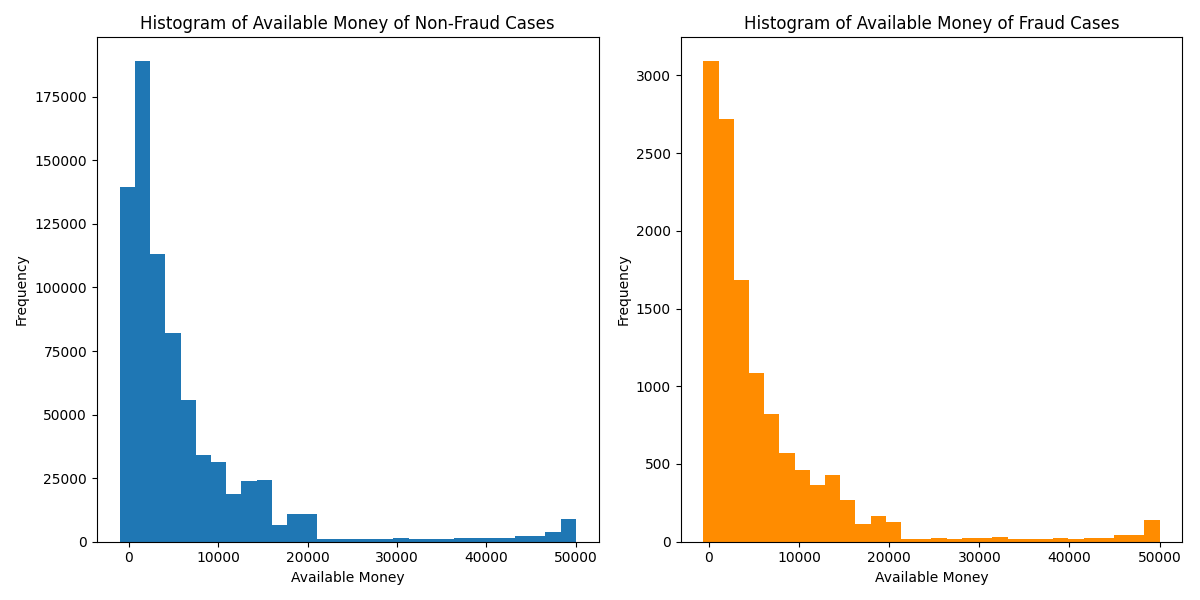

In [86]:
#creating histogram plot of Available Money for Fraud and Non-Fraud cases

plt.clf()
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for non-fraud cases with default blue color
ax1.hist(nonfraud_cases['availableMoney'], bins=30)
ax1.set_xlabel('Available Money')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Available Money of Non-Fraud Cases')

# Plot histogram for fraud cases with default orange color
ax2.hist(fraud_cases['availableMoney'], bins=30, color='darkorange')
ax2.set_xlabel('Available Money')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Available Money of Fraud Cases')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()
%matplot plt

**Explaination:** The available money statistics suggest that the average amounts are comparable for both fraud and non-fraud cases, but there are slight differences in their distributions and medians.

In [87]:
print('CASE CURRENT BALANCE STATISTICS')
print('--------------------------------------------')
print('NON-FRAUD CASE CURRENT BALANCE STATS')
print(nonfraud_cases.currentBalance.describe())
print('--------------------------------------------')
print('FRAUD CASE CURRENT BALANCE STATS')
print(fraud_cases.currentBalance.describe())
print('--------------------------------------------')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

CASE CURRENT BALANCE STATISTICS
--------------------------------------------
NON-FRAUD CASE CURRENT BALANCE STATS
count    773946.000000
mean       4502.428675
std        6446.866656
min           0.000000
25%         687.950000
50%        2446.560000
75%        5285.970000
max       47498.810000
Name: currentBalance, dtype: float64
--------------------------------------------
FRAUD CASE CURRENT BALANCE STATS
count    12417.000000
mean      4902.064338
std       7074.701649
min          0.000000
25%        821.750000
50%       2747.250000
75%       5644.350000
max      47473.940000
Name: currentBalance, dtype: float64
--------------------------------------------

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

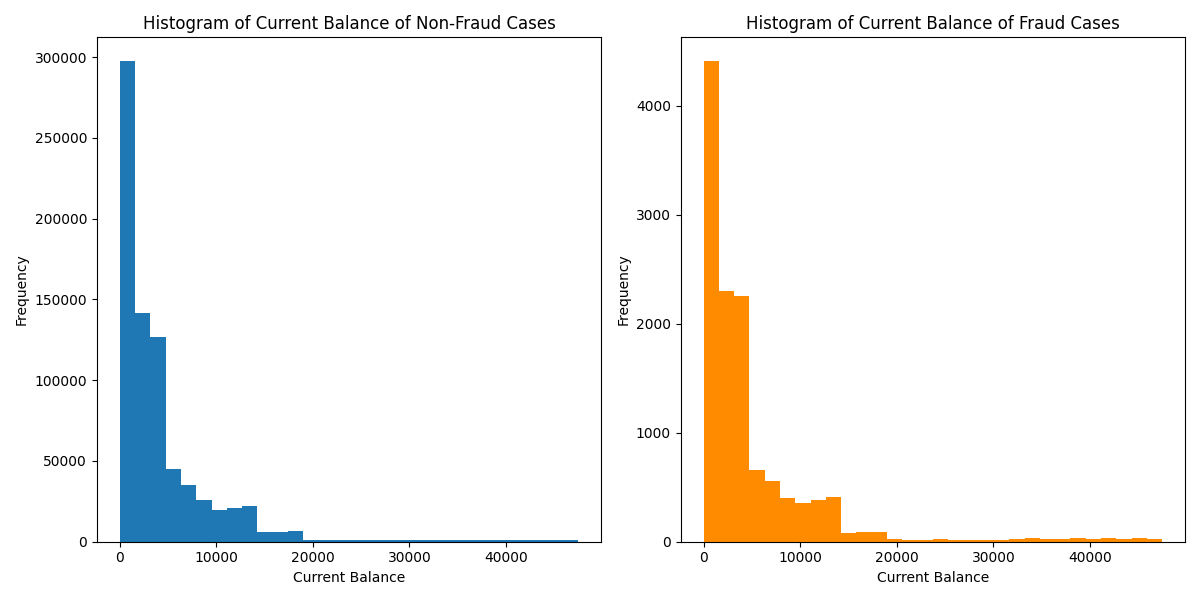

In [88]:
#creating histogram plot of Current Balance for Fraud and Non-Fraud cases

plt.clf()
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for non-fraud cases with default blue color
ax1.hist(nonfraud_cases['currentBalance'], bins=30)
ax1.set_xlabel('Current Balance')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Current Balance of Non-Fraud Cases')

# Plot histogram for fraud cases with default orange color
ax2.hist(fraud_cases['currentBalance'], bins=30, color='darkorange')
ax2.set_xlabel('Current Balance')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Current Balance of Fraud Cases')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()
%matplot plt

**Explaination:** Likewise, the current balance statistics show that the average amounts are similar for both fraud and non-fraud cases, with slight variations in their distributions and medians.

In [89]:
# transaction type per Non-fraud & Fraud cases:
transactionType_counts = transaction_data.groupby('isFraud').transactionType.value_counts().unstack(0)
transactionType_counts

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

isFraud                false   true
transactionType                    
REVERSAL               19966    337
ADDRESS_VERIFICATION   20053    116
PURCHASE              733243  11950

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

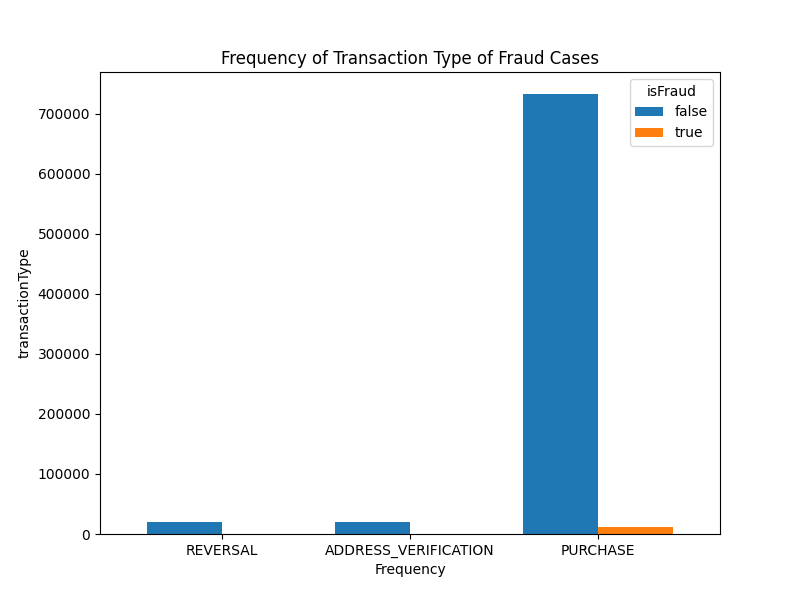

In [90]:
# #creating frequency bar chart of Transaction Type for Fraud and Non-Fraus cases
plt.clf()

#transactionType_counts = transaction_data.groupby('isFraud').transactionType.value_counts().unstack(0)

# Plot the bar chart
ax = transactionType_counts.plot.bar(figsize=(8, 6), width=0.8)
ax.set_ylabel('transactionType')
ax.set_xlabel('Frequency')
ax.title.set_text('Frequency of Transaction Type of Fraud Cases')
plt.xticks(rotation=0)
plt.show()
%matplot plt

**Explaination:** The bar plot displaying the frequency of transaction types for fraud cases reveals that "purchase" is the only major transaction type observed in fraud cases.

In [91]:
# Merchant category per Non-fraus & Fraud cases:
merchantCategoryCode_counts = transaction_data.groupby('isFraud').merchantCategoryCode.value_counts().unstack(0)
merchantCategoryCode_counts

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

isFraud                false    true
merchantCategoryCode                
online_gifts           64632  1606.0
health                 19002    90.0
furniture               7329   103.0
rideshare              49864  1272.0
entertainment          79137   961.0
hotels                 33847   250.0
auto                   21378   273.0
mobileapps             14990     NaN
subscriptions          22685   216.0
online_subscriptions   11067     NaN
food                   74476  1014.0
fuel                   23910     NaN
gym                     2209     NaN
cable/phone             1382     NaN
online_retail         197218  4938.0
fastfood              111064  1074.0
food_delivery           6000     NaN
personal care          18878    86.0
airline                14878   534.0

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

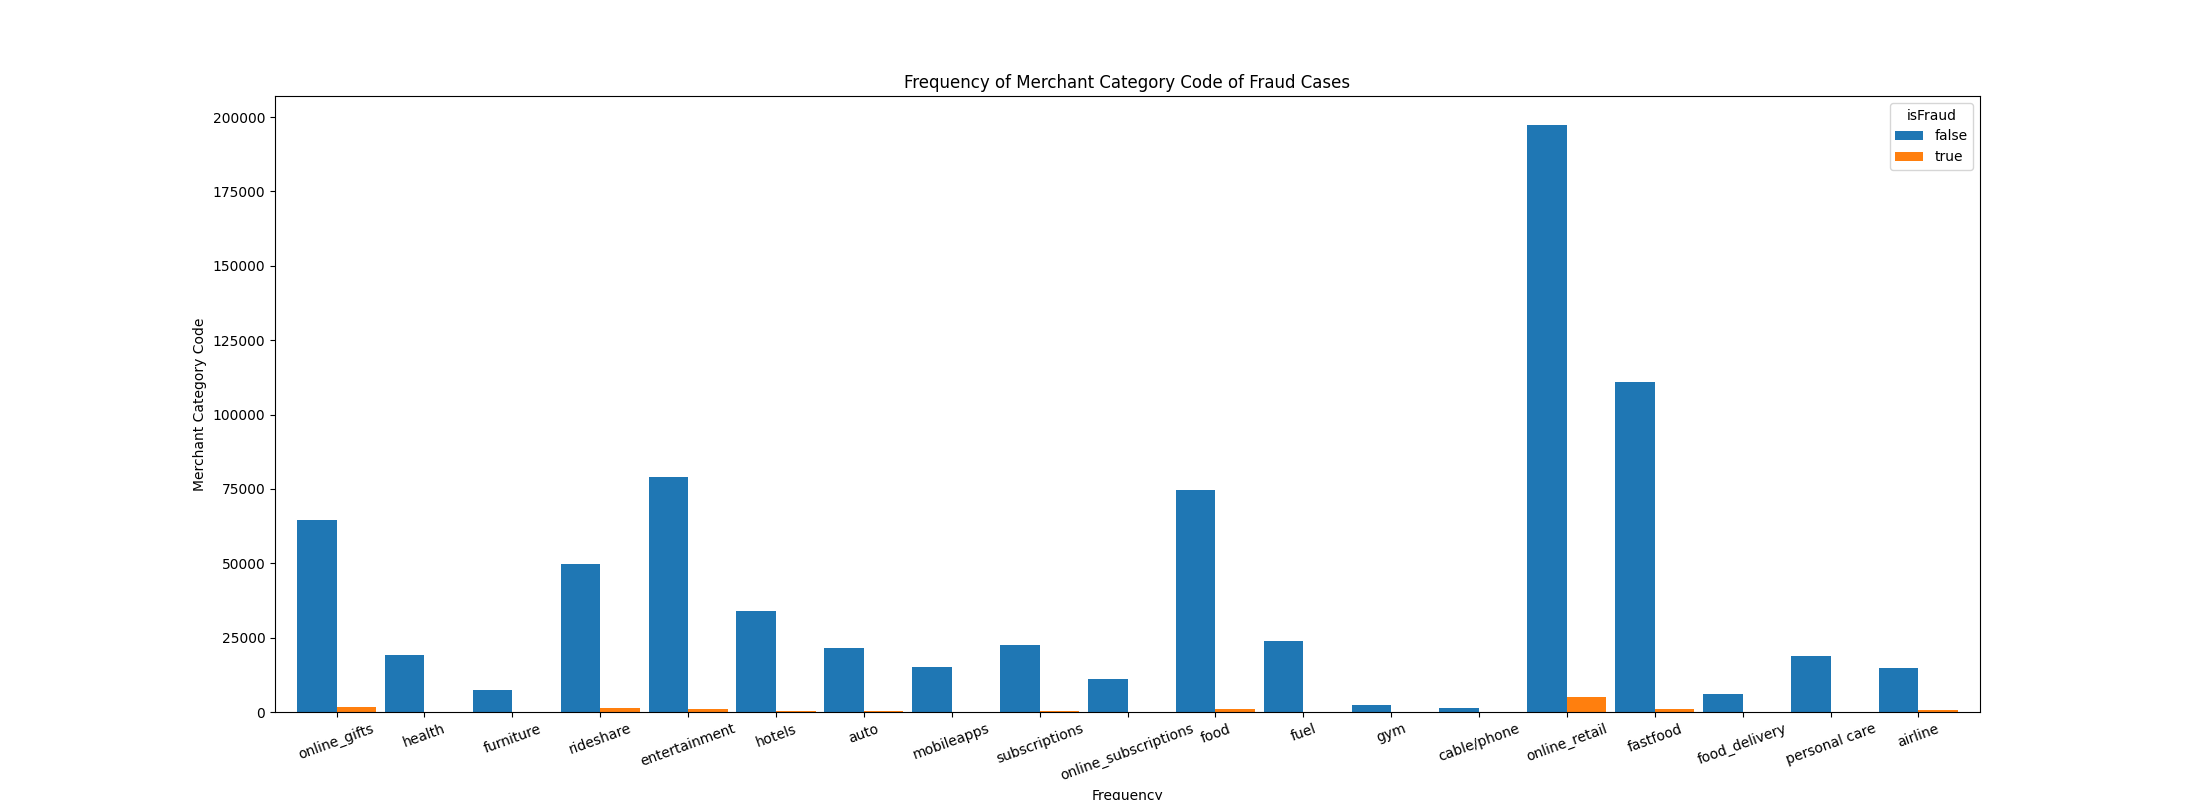

In [92]:
plt.clf()

merchantCategoryCode_counts = transaction_data.groupby('isFraud').merchantCategoryCode.value_counts().unstack(0)

# Plot the bar chart
ax = merchantCategoryCode_counts.plot.bar(figsize=(22, 8), width=0.9)
ax.set_ylabel('Merchant Category Code')
ax.set_xlabel('Frequency')
ax.title.set_text('Frequency of Merchant Category Code of Fraud Cases')
plt.xticks(rotation=20)
plt.show()
%matplot plt

**Explaination:** The merchantCategoryCode_counts and the bar chart depicting the frequency of merchant category codes for fraud cases highlights that online retail has the highest count, followed by online gifts, rideshare, fast food, and food categories.

# Visualizations

**Getting 30% subset of data before visualization**

In [206]:
import pandas as pd
from pyspark.sql import SparkSession

# Create a SparkSession (if you haven't already)
spark = SparkSession.builder.appName("RandomSample").getOrCreate()

# Load your dataset into a DataFrame (replace "your_dataset_path" with the actual path)
df1 = spark.read.csv('s3://gba6430-project/transaction_data.csv', header=True, inferSchema=True)

# Specify the fraction you want to sample (e.g., 0.1 means 10% of the data)
fraction_to_sample = 0.3

# Set the random seed (optional but useful for reproducibility)
random_seed = 42

# Use the sample function to take a random sample
# The first parameter is the fraction to sample, the second parameter is the random seed (optional)
random_sample_df = df1.sample(fraction=fraction_to_sample, seed=random_seed)

# Convert the PySpark DataFrame to a pandas DataFrame
sample_df = random_sample_df.toPandas()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [207]:
sample_df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236258 entries, 0 to 236257
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   _c0                       236258 non-null  int32         
 1   accountNumber             236258 non-null  int32         
 2   customerId                236258 non-null  int32         
 3   creditLimit               236258 non-null  int32         
 4   availableMoney            236258 non-null  float64       
 5   transactionDateTime       236258 non-null  datetime64[ns]
 6   transactionAmount         236258 non-null  float64       
 7   merchantName              236258 non-null  object        
 8   acqCountry                234903 non-null  object        
 9   merchantCountryCode       236050 non-null  object        
 10  posEntryMode              235023 non-null  float64       
 11  posConditionCode          236135 non-null  float64       
 12  me

#### Histogram for Numeric Variables <br>

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

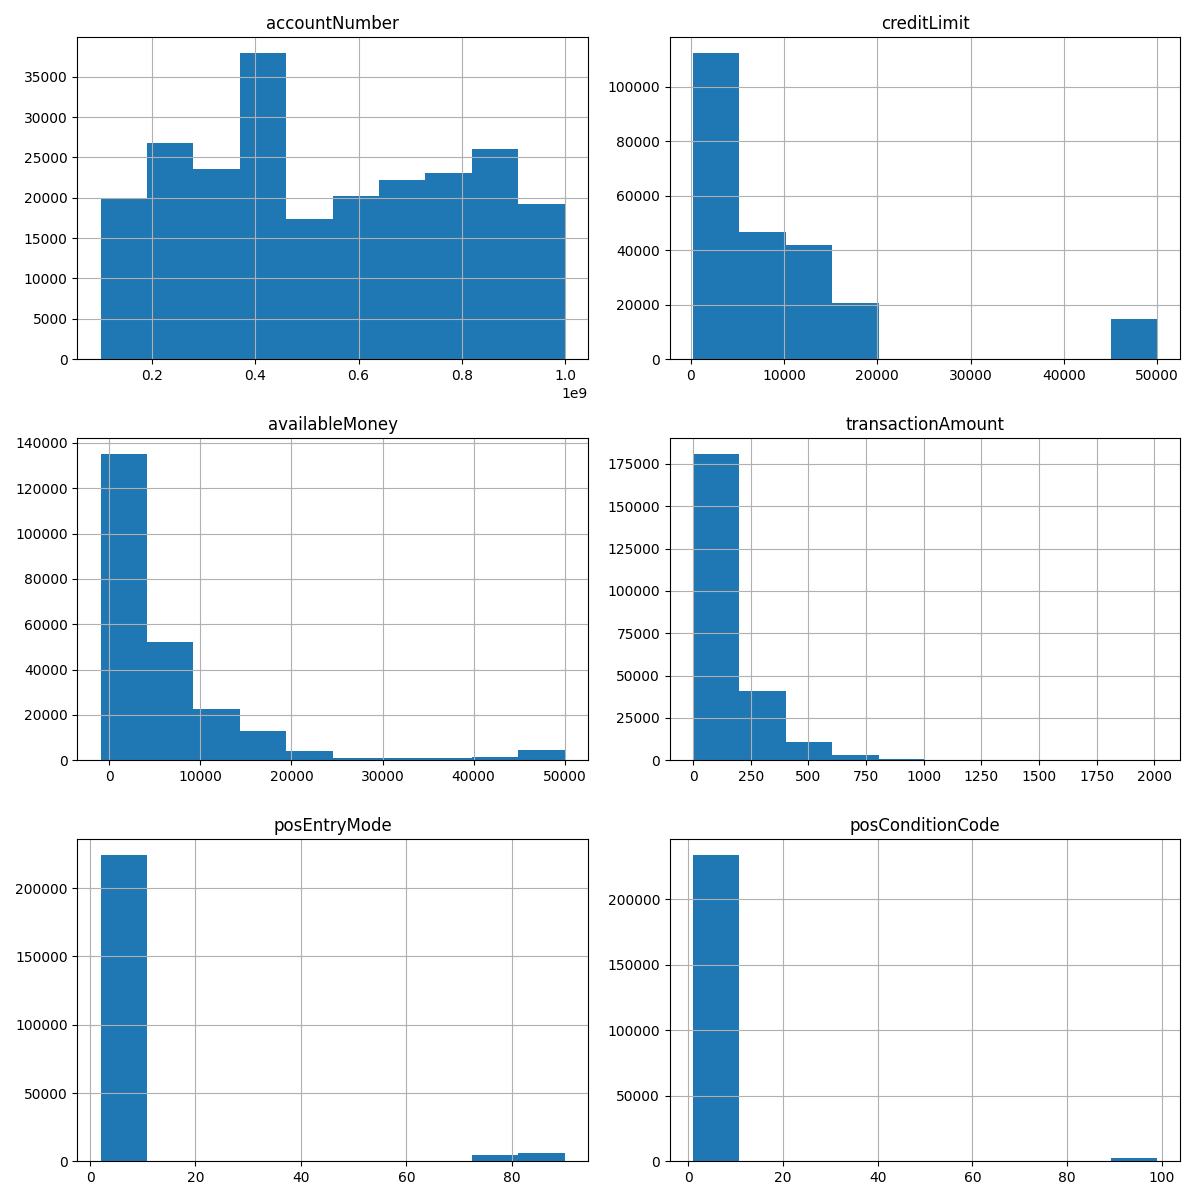

In [211]:
import matplotlib.pyplot as plt

# Define the function to plot histograms of numeric features
def plot_hist(df, features, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
    fig.tight_layout(pad=3.5)
    
    for i, feature in enumerate(features):
        ax = axes[i // n_cols, i % n_cols]
        df[feature].hist(ax=ax)
        ax.set_title(feature)
    
    plt.subplots_adjust(hspace=0.7, wspace=0.8)
    plt.show()

# selected the numeric variables from the dataset to generate a histogram
features = ['accountNumber', 'creditLimit', 'availableMoney', 'transactionAmount',
            'posEntryMode', 'posConditionCode']

plot_hist(df=sample_df, features=features, n_rows=3, n_cols=2)
plt.subplots_adjust(hspace = 0.7, wspace = 0.8)
plt.tight_layout()
%matplot plt

**Explaination:**

1. Account Number histogram shows a variety of account numbers in the system.
2. Credit Limit histogram shows majority of the credit card holders has less than $20,000 as their credit limit.
3. Available Money histogram shows that majority of credit card holders have a close to zero balance.
4. Transaction Amount histogram shows that credit card holder uses their credit card for small purchases.
5. posEntryMode histogram shows that the most popular method to enter the cardholder account number and expiration date is manually, using magnetic strip, or chip.
6. posConditionMode histogram shows that there is a high frequency of cardholder not being present.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

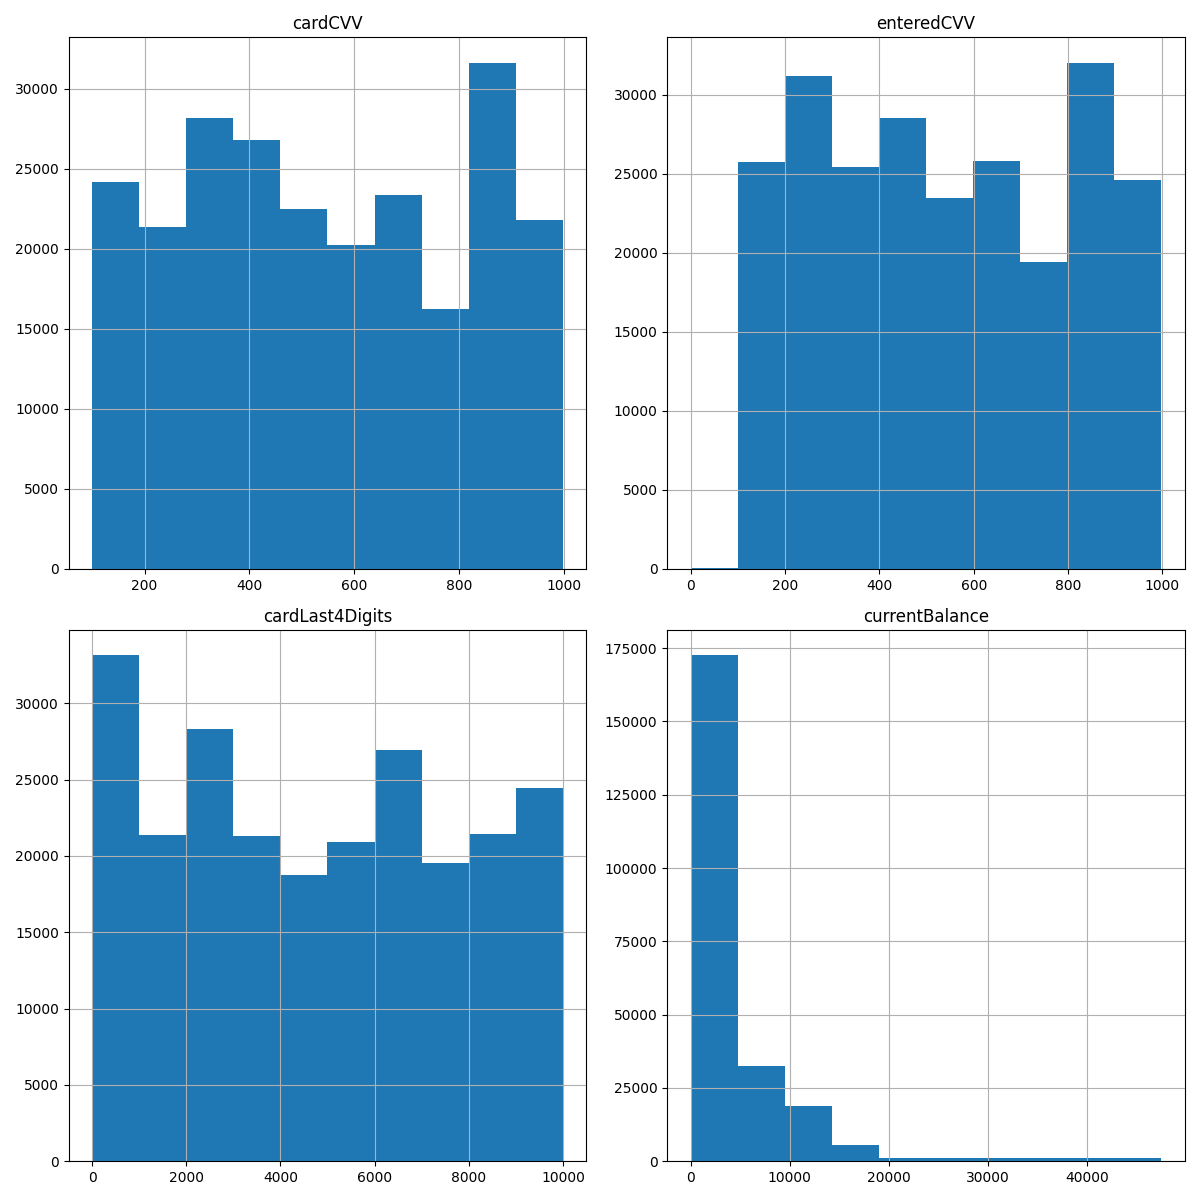

In [210]:
# selected the numeric variables from the dataset to generate a histogram
features1 = ['cardCVV', 'enteredCVV', 'cardLast4Digits', 'currentBalance']

plot_hist(df=sample_df, features=features1, n_rows=2, n_cols=2)
plt.subplots_adjust(hspace = 0.6, wspace=0.6)
plt.tight_layout()
%matplot plt

**Explaination:**

1. Card CVV histogram shows a variety of security code generated from 100 to 999.
2. Entered CVV histogram shows a variety of entered security code generated from 100 to 999.
3. Card Last 4 Digits histogram shows a variety of 4 digit codes generated from 0000 to 9999.
4. Current Balance histogram shows that majority of credit cardholders only have a small outstanding balance.

#### Bar Chart for Categorical Variables <br>
- Selected each categorical variables in the dataset

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

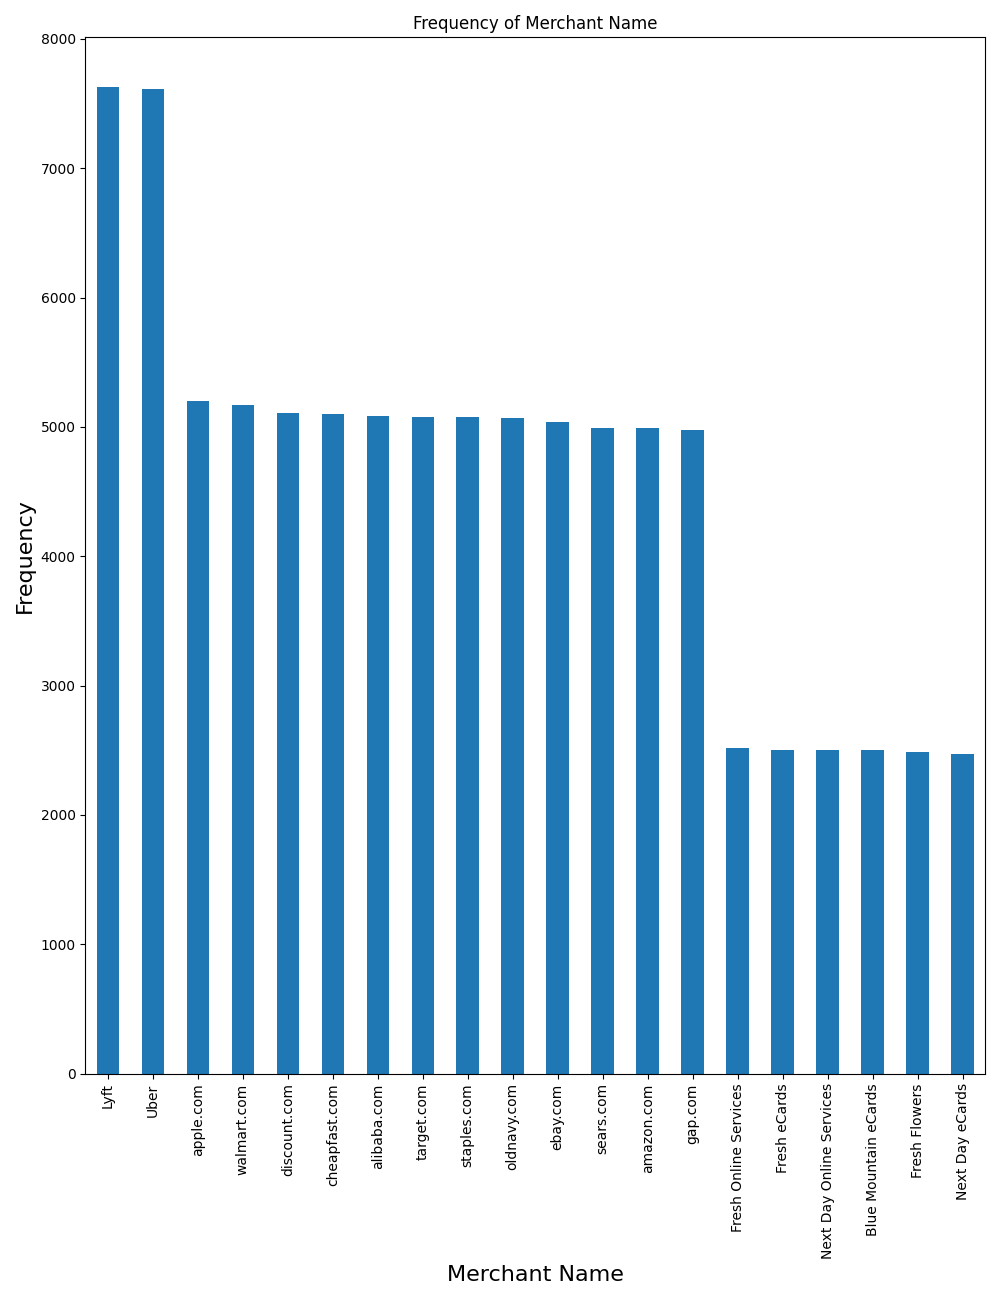

In [212]:
# Frequency bar chart of Merchant Name
plt.clf()
merchantName = sample_df['merchantName'].value_counts().head(20)
fig, ax = plt.subplots(figsize=(10, 13))
merchantName.plot.bar(ax = ax)
ax.title.set_text('Frequency of Merchant Name')
ax.set_xlabel("Merchant Name", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
plt.tight_layout()
%matplot plt

**Explaination:** Majority of credit cardholders uses their credit card on Uber and Lyft.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

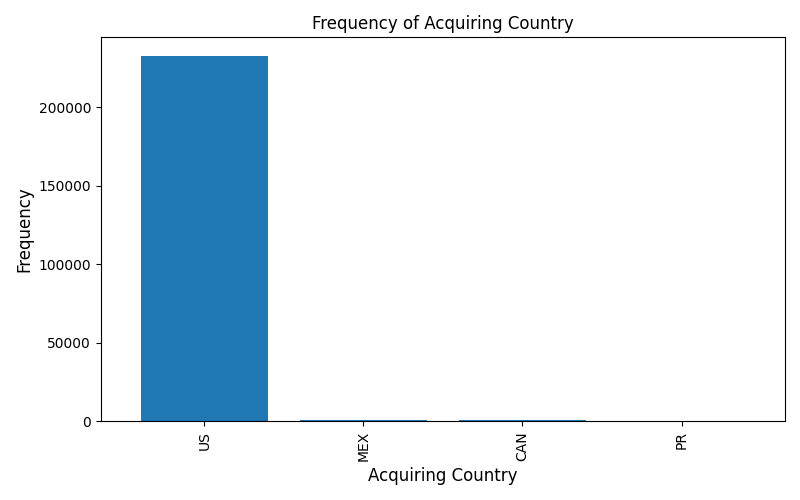

In [213]:
# Frequency bar chart of Acquiring Country
plt.clf()
acq_country = sample_df['acqCountry'].value_counts()
ax = acq_country.plot.bar(figsize=(8, 5), width=0.8)
ax.title.set_text('Frequency of Acquiring Country')
ax.set_xlabel('Acquiring Country', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
plt.tight_layout()
%matplot plt

**Explaination:** Majority of credit cardholders uses their credit card in the United States (US).

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

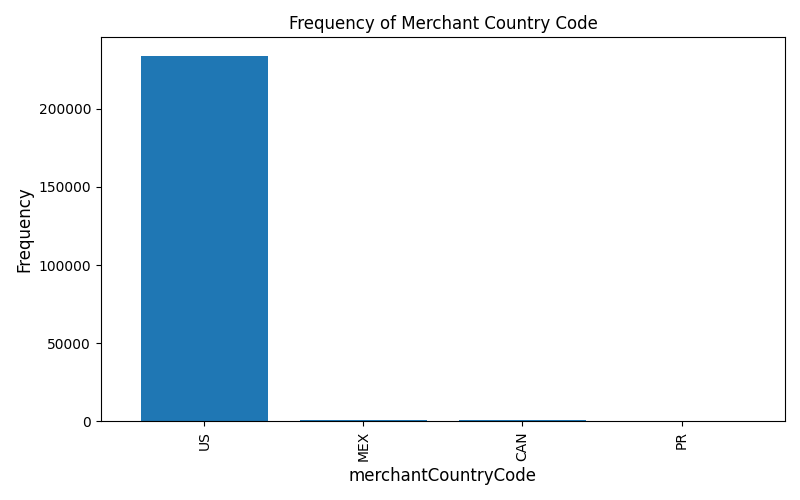

In [214]:
# Frequency bar chart of Merchant Country Code
plt.clf()
merchantCountryCode = sample_df['merchantCountryCode'].value_counts()
ax = merchantCountryCode.plot.bar(figsize=(8, 5), width=0.8)
ax.title.set_text('Frequency of Merchant Country Code')
ax.set_xlabel('merchantCountryCode', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
plt.tight_layout()
%matplot plt

**Explaination:** Majority of credit cardholders uses their credit card on US based companies.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

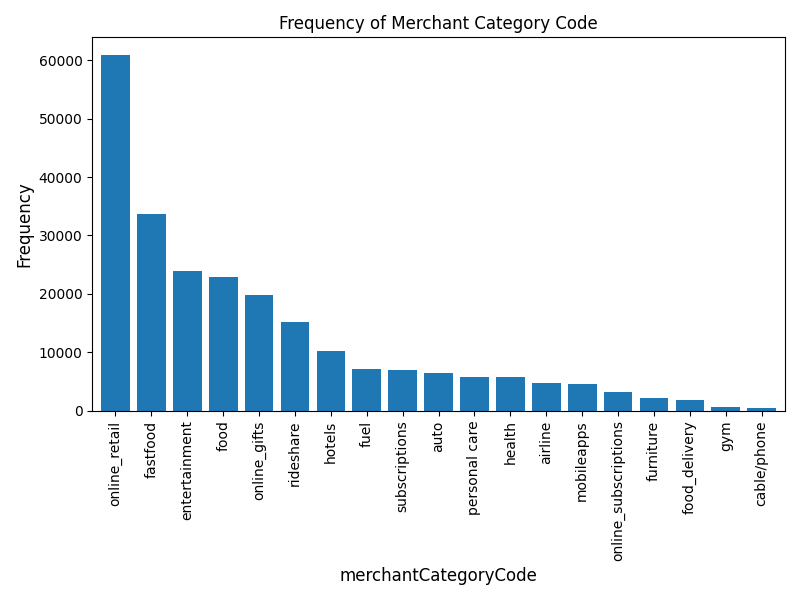

In [215]:
# Frequency bar chart of Merchant Category Code
plt.clf()
merchantCategoryCode = sample_df['merchantCategoryCode'].value_counts()
ax = merchantCategoryCode.plot.bar(figsize=(8, 6), width=0.8)
ax.title.set_text('Frequency of Merchant Category Code')
ax.set_xlabel('merchantCategoryCode', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
plt.tight_layout()
%matplot plt

**Explaination:** The 5 most popular spending through credit card purchases are online retail stores, fast food, entertainment, food, and online gifting. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

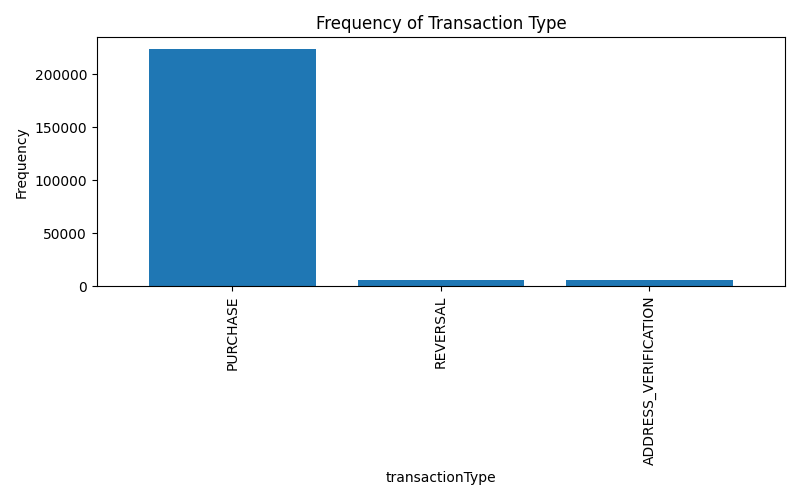

In [216]:
# Frequency bar chart of Transaction Type
plt.clf()
transactionType = sample_df['transactionType'].value_counts()
ax = transactionType.plot.bar(figsize=(8, 5), width=0.8)
ax.title.set_text('Frequency of Transaction Type')
ax.set_xlabel('transactionType')
ax.set_ylabel('Frequency')
plt.tight_layout()
%matplot plt

**Explaination:** Based on the data, purchases are the most popular method of transaction.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

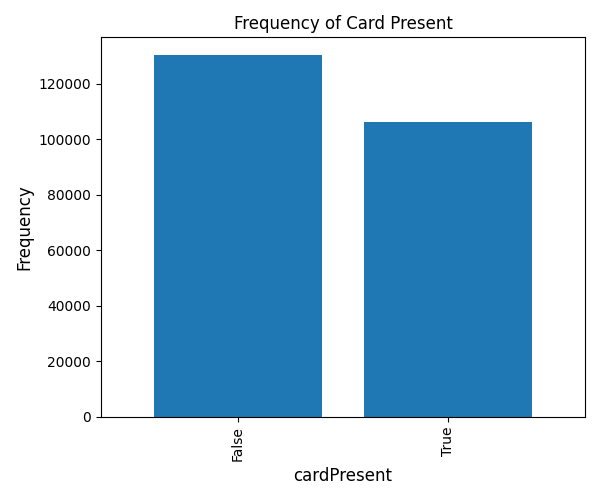

In [217]:
#Frequency bar chart of Card Present
plt.clf()
cardPresent = sample_df['cardPresent'].value_counts()
ax = cardPresent.plot.bar(figsize=(6, 5), width=0.8)
ax.title.set_text('Frequency of Card Present')
ax.set_xlabel('cardPresent', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
plt.tight_layout()
%matplot plt

**Explaination:** Physically cards are not as popular as digital cards per the dataset. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

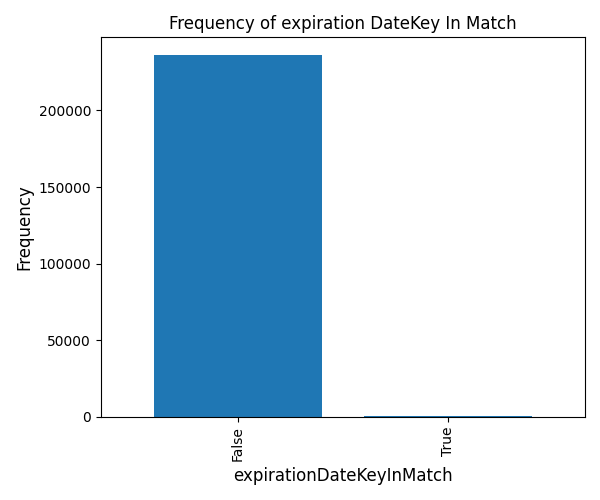

In [218]:
#Frequency bar chart of expiration DateKey In Match
plt.clf()
expirationDateKeyInMatch = sample_df['expirationDateKeyInMatch'].value_counts()
ax = expirationDateKeyInMatch.plot.bar(figsize=(6, 5), width=0.8)
ax.title.set_text('Frequency of expiration DateKey In Match')
ax.set_xlabel('expirationDateKeyInMatch', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
plt.tight_layout()
%matplot plt

**Explaination:** This shows that the credit card is not expired when the transaction is being processed. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

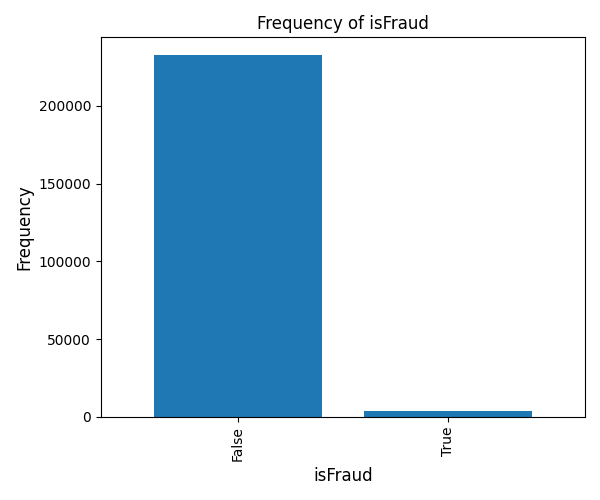

In [219]:
#Frequency bar chart of fraud transaction
plt.clf()
isFraud = sample_df['isFraud'].value_counts()
ax = isFraud.plot.bar(figsize=(6, 5), width=0.8)
ax.title.set_text('Frequency of isFraud')
ax.set_xlabel('isFraud', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
plt.tight_layout()
%matplot plt

**Explaination:** The percentage of fraudlent activity is low based on this dataset.

 ### Scatter Plot<br>

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

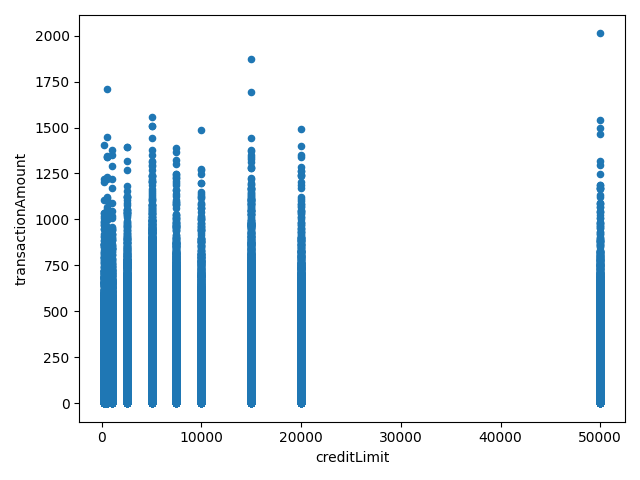

In [220]:
# comparing creditlimit vs transactin amount
sample_df.plot.scatter('creditLimit', 'transactionAmount')
plt.tight_layout()
%matplot plt

**Explaination:** This shows that credit cardholders with a higher credit limit tends to make larger purchases on their credit card compared to credit cardholders with a lower credit limit. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

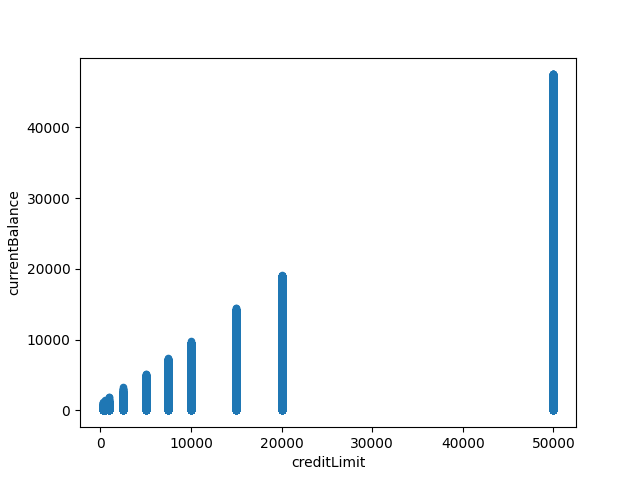

In [221]:
sample_df.plot.scatter('creditLimit', 'currentBalance')
%matplot plt

**Explaination:** This shows that credit cardholders with a higher credit limit tends to have a larger current balance compared to people that have lower credit limit.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

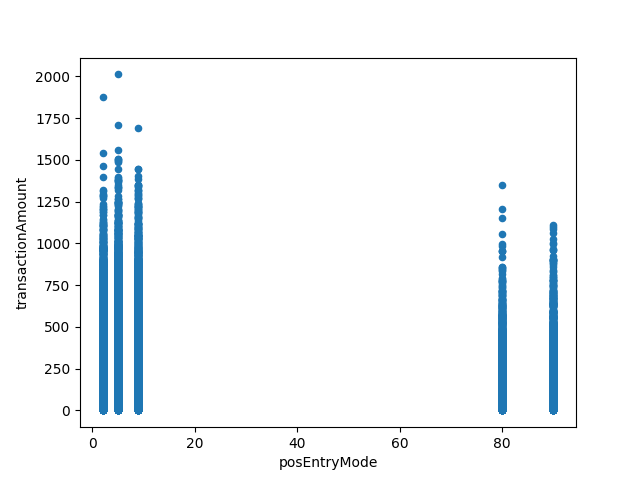

In [222]:
sample_df.plot.scatter('posEntryMode', 'transactionAmount')
%matplot plt

**Explaination:** This shows that the larger purchases requires the credit card to be present to validate purchaser and credit card by using the card's magentic strip, chip, key entry, or OCR read. 

# Outlier Analysis

Removed outliers based on the visualizations above ensuring that only less than 3% are removed.

In [108]:
transaction_data.shape

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(786363, 23)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

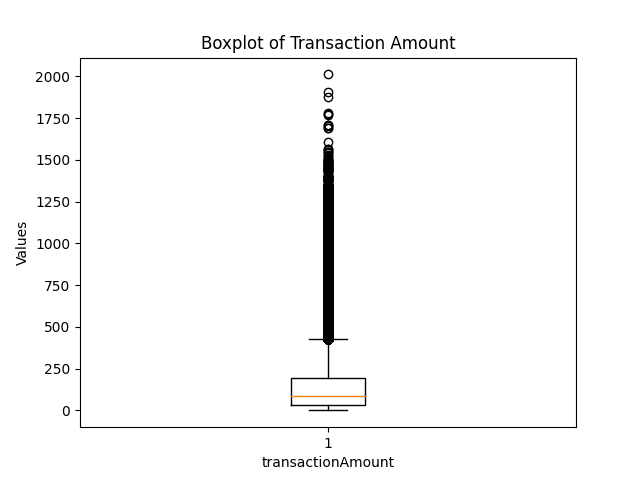

In [109]:
# Boxpot to identify outliers

plt.clf()
# Create a figure and axis
fig, ax = plt.subplots()

# Create a boxplot
ax.boxplot(transaction_data['transactionAmount'])

# Set labels and title
ax.set_xlabel('transactionAmount')
ax.set_ylabel('Values')
ax.set_title('Boxplot of Transaction Amount')

# Show the plot
plt.show()
%matplot plt

**Explaination:** Most of the outliers lies beyond $1600 range so decided to remove those as outliers

In [110]:
# removing outliers
no_outliers = transaction_data[transaction_data.transactionAmount < 1600]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

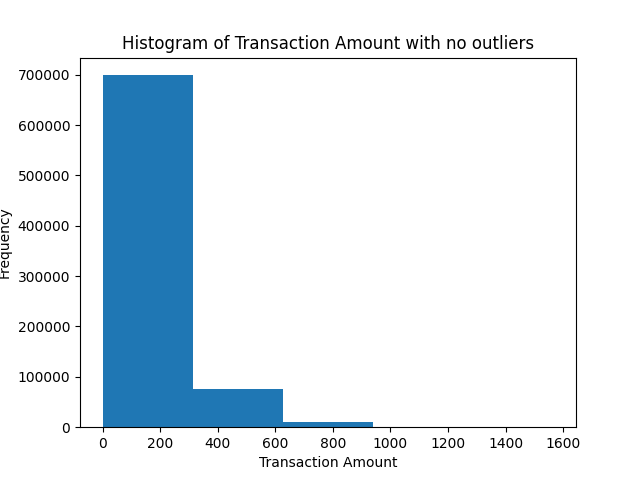

In [111]:
# Histogram plot of Transaction Amount with no outlier
plt.clf()
plt.hist(no_outliers['transactionAmount'], bins=5)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount with no outliers')
plt.show()
%matplot plt

In [112]:
outliers = transaction_data[transaction_data.transactionAmount > 1600]
outliers.shape

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(12, 23)

**Explaination:** Less than 0.01% observation removed as outliers.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

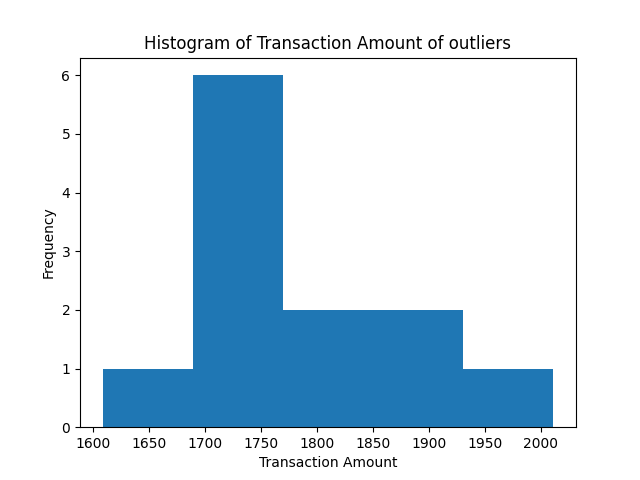

In [113]:
# Histogram plot of Transaction Amount with only outlier
plt.clf()
plt.hist(outliers['transactionAmount'], bins=5)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount of outliers')
plt.show()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

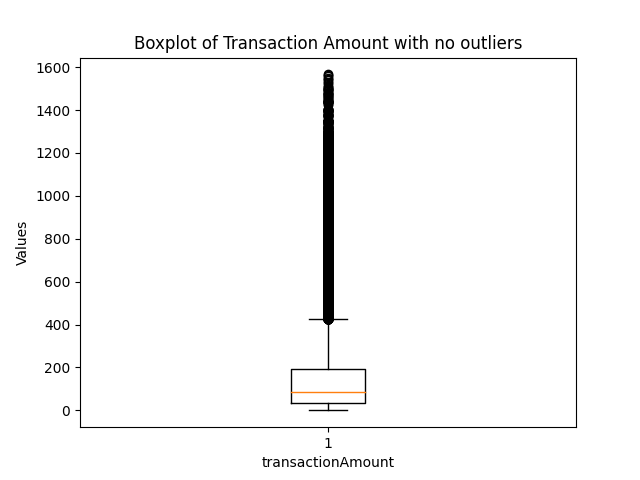

In [114]:
# box plot after removing the outliers
plt.clf()
# Create a figure and axis
fig, ax = plt.subplots()

# Create a boxplot
ax.boxplot(no_outliers['transactionAmount'])

# Set labels and title
ax.set_xlabel('transactionAmount')
ax.set_ylabel('Values')
ax.set_title('Boxplot of Transaction Amount with no outliers')

# Show the plot
plt.show()
%matplot plt

#### Redraw the histogram with the outliers removed.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

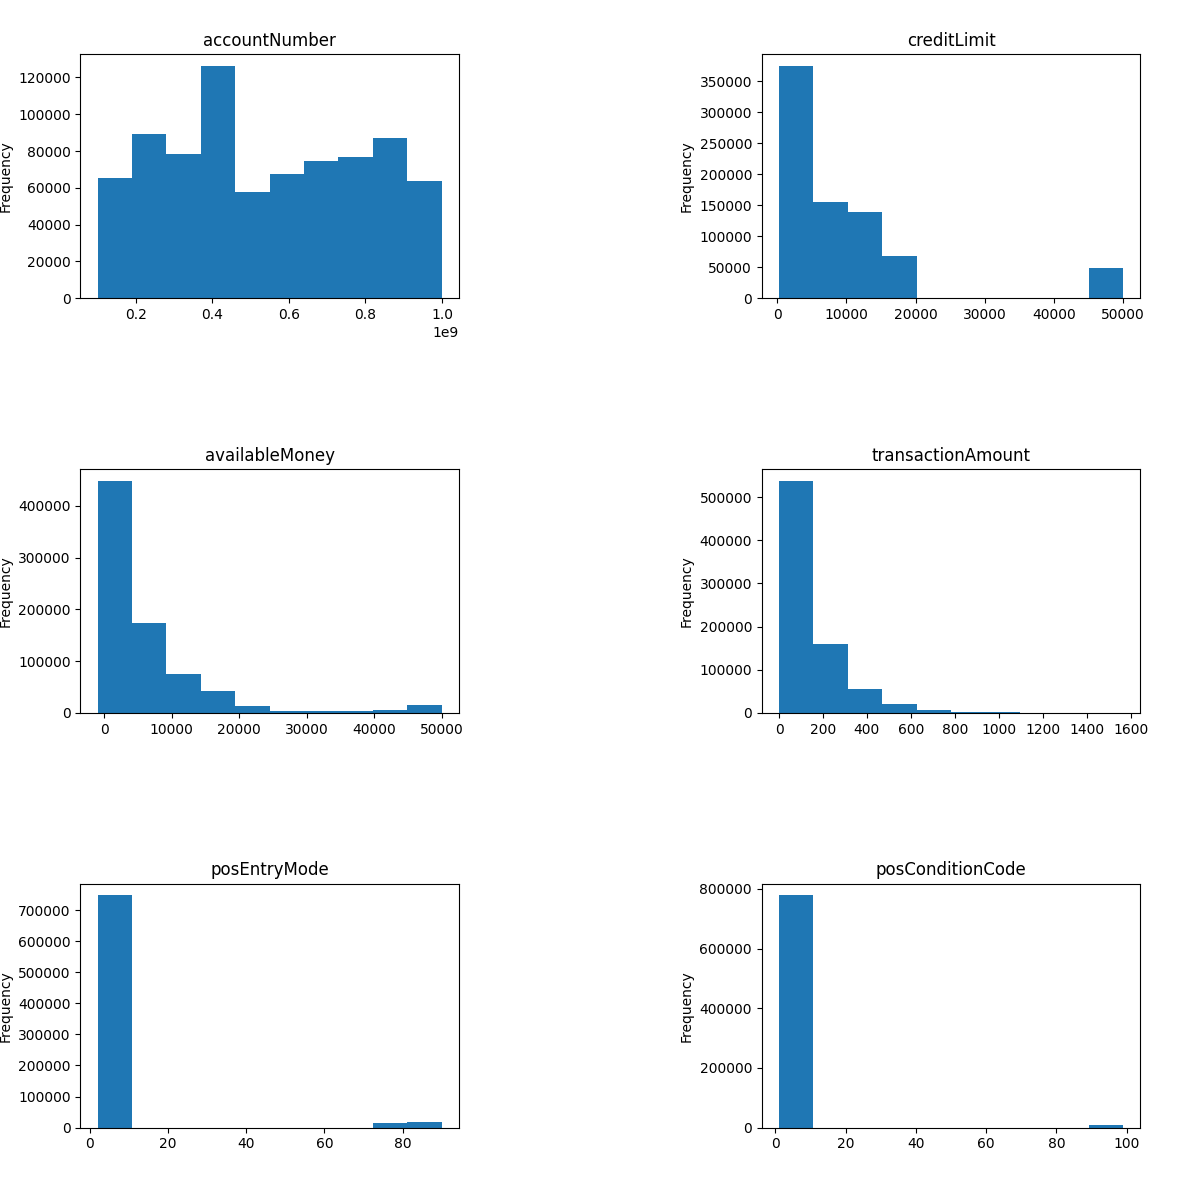

In [115]:
# selected the numeric variables from the dataset to generate a histogram
features = ['accountNumber', 'creditLimit', 'availableMoney', 'transactionAmount',
            'posEntryMode', 'posConditionCode']

plot_hist(df = no_outliers, features = features, n_rows = 3, n_cols = 2)
plt.subplots_adjust(hspace = 0.7, wspace = 0.8)
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

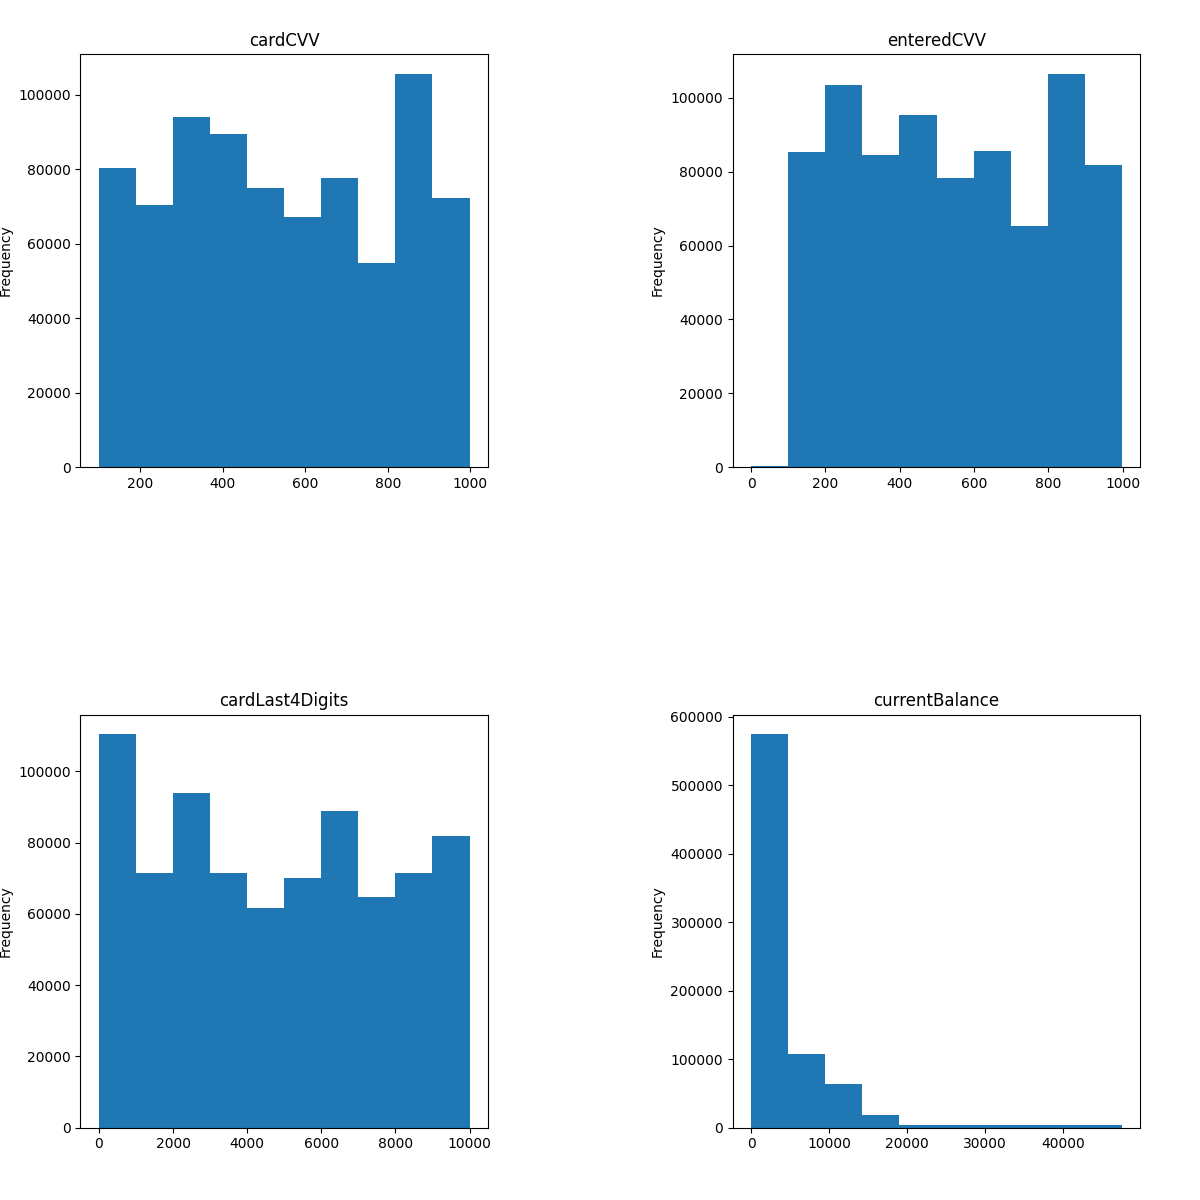

In [116]:
# selected the numeric variables from the dataset to generate a histogram
features1 = ['cardCVV', 'enteredCVV', 'cardLast4Digits', 'currentBalance']

plot_hist(df = no_outliers, features = features1, n_rows = 2, n_cols = 2)
plt.subplots_adjust(hspace = 0.6, wspace=0.6)
%matplot plt

### Descriptive Statistics (Part 2)

Rerunning the descriptive statistics with the outliers removed.

In [117]:
# Printing the shape of dataset without outliers
"Dataset Dimensions: {}x{}".format(no_outliers.shape[0], transaction_data.shape[1])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Dataset Dimensions: 786351x23'

In [118]:
# Total unique accounts of the dataset with no outliers:
"Total unique accounts: {}".format(len(no_outliers['accountNumber'].unique()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Total unique accounts: 5000'

In [119]:
"Total unique transactions based on transaction amount: {}".format(len(no_outliers['transactionAmount'].unique()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Total unique transactions based on transaction amount: 66026'

In [120]:
# shows the descriptive statistics of the dataset with no outliers
no_outliers.describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       accountNumber    customerId   creditLimit  availableMoney         transactionDateTime  transactionAmount   posEntryMode  posConditionCode             accountOpenDate     dateOfLastAddressChange        cardCVV     enteredCVV  cardLast4Digits  currentBalance
count   7.863510e+05  7.863510e+05  786351.00000   786351.000000                      786351      786351.000000  782297.000000     785942.000000                      786351                      786351  786351.000000  786351.000000    786351.000000   786351.000000
mean    5.372310e+08  5.372310e+08   10759.00000     6250.678692  2016-07-06 01:58:24.169095         136.960889       9.000000          3.000000  2014-02-03 01:11:13.572488  2015-04-14 06:46:01.066241     544.000000     544.000000      4757.000000     4508.767472
min     1.000881e+08  1.000881e+08     250.00000    -1005.630000         2016-01-01 00:01:02           0.000000       2.000000          1.000000         1989-08-22 00:00:00         1989-08-22 00:00:00     100

In [121]:
cases = len(no_outliers)
nonfraud_count = len(no_outliers[no_outliers.isFraud == 'False'])
fraud_count = len(no_outliers[no_outliers.isFraud == 'True'])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('CASE COUNT:')
print('--------------------------------------------')
print('Total number of cases are {}'.format(cases))
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Number of fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}'.format(fraud_percentage))
print('--------------------------------------------')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

CASE COUNT:
--------------------------------------------
Total number of cases are 786351
Number of Non-fraud cases are 773935
Number of fraud cases are 12416
Percentage of fraud cases is 1.6
--------------------------------------------

**Explaination:** Even with outliers removed, we are still able to maintain 1.6% of fraudlent cases in our new dataset.

# Data Wrangling - Duplicate Transactions

### A duplicate transaction is of two types.

1. reversed transaction (only two transaction of same amount for a single account number)
2. multi swipe transaction (more than two transaction of same amount for a single account number)

### Reversed Transaction

In [122]:
# filter transactions based on REVERSAL
reversal=transaction_data[transaction_data['transactionType']=='REVERSAL'] 
reversal.head(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

     accountNumber  customerId  creditLimit  availableMoney transactionDateTime  transactionAmount            merchantName acqCountry merchantCountryCode  posEntryMode  posConditionCode merchantCategoryCode currentExpDate accountOpenDate dateOfLastAddressChange  cardCVV  enteredCVV  cardLast4Digits transactionType  currentBalance  cardPresent  expirationDateKeyInMatch  isFraud
39       574788567   574788567         2500         2200.98 2016-05-24 01:38:03             215.13         Convenient Tire         US                  US             9                 1                 auto        10/2021      2015-10-13              2015-10-13      206         206             8522        REVERSAL          299.02         True                     False    False
73       574788567   574788567         2500         2432.72 2016-10-07 10:23:57               3.87             Eazy Repair         US                  US             5                 1                 auto        10/2022      2015-10-13   

In [123]:
print('Highest amount to be reversed is $ {}'.format(reversal['transactionAmount'].max()))
print('Total number of reverse transactions are {} '.format(len(reversal['transactionAmount'])))
print('Total sum of reverse transaction is $ {} '.format(reversal['transactionAmount'].sum()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Highest amount to be reversed is $ 1435.64
Total number of reverse transactions are 20303 
Total sum of reverse transaction is $ 2821792.500000003

In [124]:
reversal.describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       accountNumber    customerId   creditLimit  availableMoney         transactionDateTime  transactionAmount  posEntryMode  posConditionCode             accountOpenDate     dateOfLastAddressChange     cardCVV    enteredCVV  cardLast4Digits  currentBalance
count   2.030300e+04  2.030300e+04  20303.000000    20303.000000                       20303       20303.000000  20197.000000      20292.000000                       20303                       20303  20303.0000  20303.000000      20303.00000    20303.000000
mean    5.358713e+08  5.358713e+08  10890.000000     6066.488049  2016-07-07 08:57:06.813328         138.984017      8.000000          3.000000  2014-02-05 04:33:33.574348  2015-05-18 17:34:35.456829    544.0000    544.000000       4746.00000     4823.577459
min     1.000881e+08  1.000881e+08    250.000000     -440.580000         2016-01-01 01:54:16           0.000000      2.000000          1.000000         1989-08-22 00:00:00         1989-08-22 00:00:00    100.0000     30.0000

In [125]:
# number of transactions with 0.00 amount in the number of reverse transaction is
print('Total number of reverse transactions where card charged is 0.00 USD : {} '.format(len(reversal[reversal['transactionAmount']==0.00])))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total number of reverse transactions where card charged is 0.00 USD : 572

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

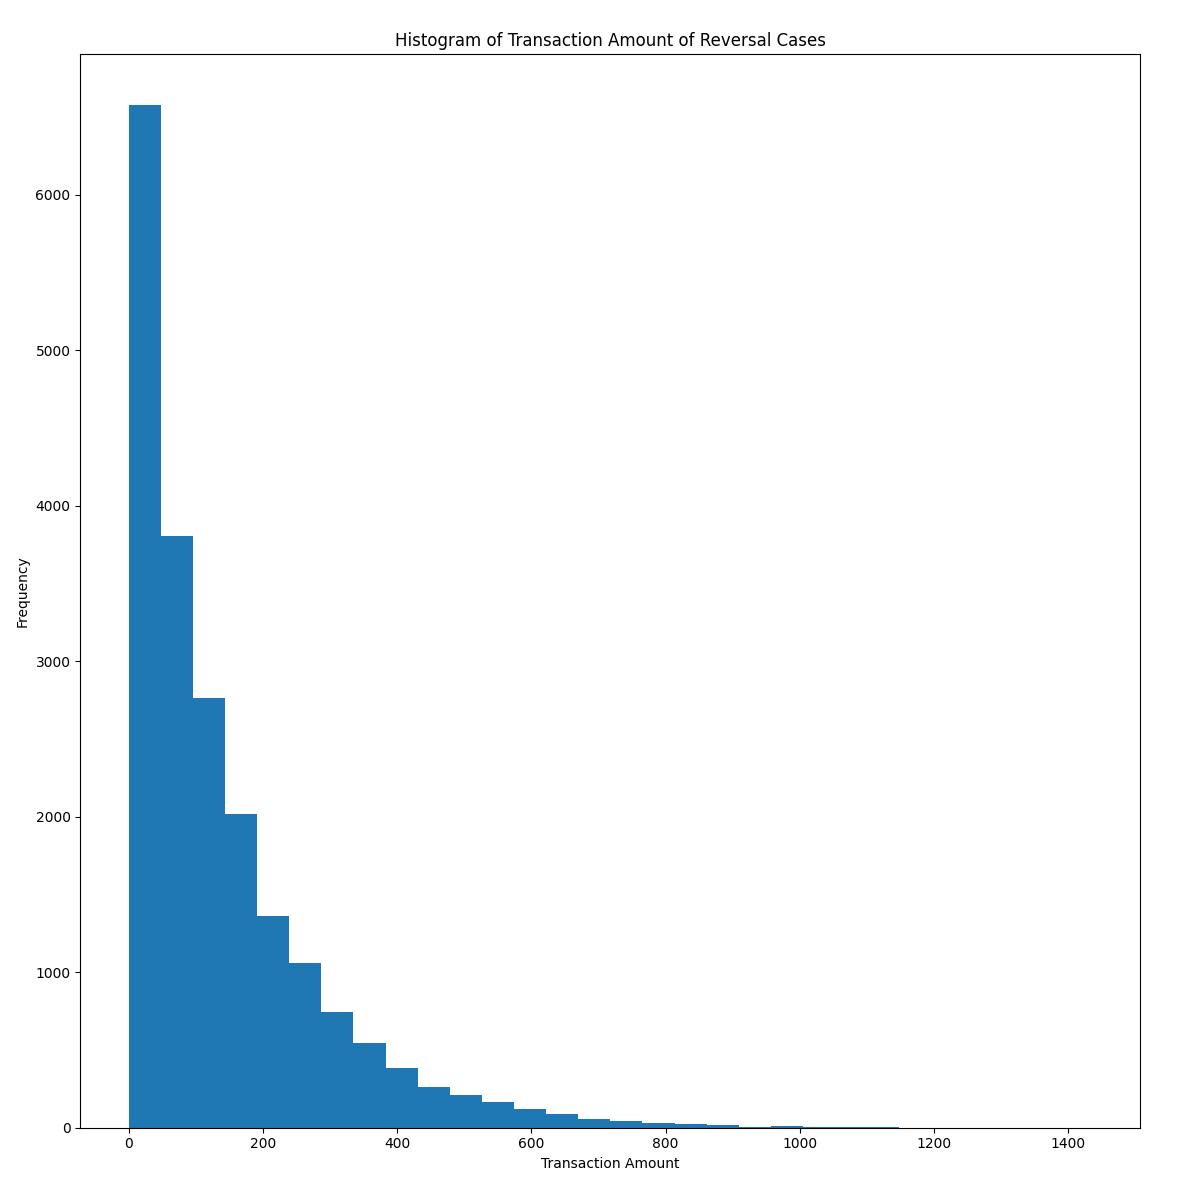

In [126]:
#
plt.clf()
plt.hist(reversal['transactionAmount'], bins=30)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount of Reversal Cases')
plt.show()
%matplot plt

In [127]:
# number of transactions with 0.00 amount in the number of reverse transaction is
print('Total number of reverse transactions where card charged is 0.00 USD : {} '.format(len(reversal[reversal['transactionAmount']==0.00])))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total number of reverse transactions where card charged is 0.00 USD : 572

In [128]:
# Create dummy variable for column 'x'
dummy = ps.get_dummies(transaction_data['transactionType'], prefix='is_')

# Add dummy variable to the original dataframe
df = ps.concat([transaction_data, dummy], axis=1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Multi Swipe Transaction

In [129]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [130]:
# groupby accountNumber,transactionAmount and transactionDateTime diff 
#to check whether the difference between successive transactions is less than 120 seconds:

# pandas_on_spark to spark
spark_df = df.to_spark()

# Sort the DataFrame by 'transactionDateTime'
df_sorted = spark_df.orderBy('transactionDateTime')

# Define a window specification for grouping
window_spec = Window.partitionBy('accountNumber', 'transactionAmount').orderBy('transactionDateTime')

# Calculate the time difference in seconds using lag function within the window
time_diff = F.unix_timestamp(df_sorted['transactionDateTime']) - F.unix_timestamp(F.lag(df_sorted['transactionDateTime']).over(window_spec))

# Check if time difference is less than 120 seconds
is_multi_swipe = time_diff < 120

# Add 'multiSwipe?' column to the DataFrame
spark_df = df_sorted.select('*', is_multi_swipe.cast('boolean').alias('is_multiSwipe'))



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt/yarn/usercache/livy/appcache/application_1691080712159_0001/container_1691080712159_0001_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

In [131]:
spark_df.show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+----------+-----------+--------------+-------------------+-----------------+------------+----------+-------------------+------------+----------------+--------------------+--------------+-------------------+-----------------------+-------+----------+---------------+---------------+--------------+-----------+------------------------+-------+------------------------+------------+------------+-------------+
|accountNumber|customerId|creditLimit|availableMoney|transactionDateTime|transactionAmount|merchantName|acqCountry|merchantCountryCode|posEntryMode|posConditionCode|merchantCategoryCode|currentExpDate|    accountOpenDate|dateOfLastAddressChange|cardCVV|enteredCVV|cardLast4Digits|transactionType|currentBalance|cardPresent|expirationDateKeyInMatch|isFraud|is__ADDRESS_VERIFICATION|is__PURCHASE|is__REVERSAL|is_multiSwipe|
+-------------+----------+-----------+--------------+-------------------+-----------------+------------+----------+-------------------+------------+--------

In [132]:
df = spark_df.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [133]:
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   accountNumber  customerId  ...  is__REVERSAL  is_multiSwipe
0      100088067   100088067  ...             0           None
1      100088067   100088067  ...             0          False
2      100088067   100088067  ...             0          False
3      100088067   100088067  ...             0          False
4      100088067   100088067  ...             0          False

[5 rows x 27 columns]

In [134]:
df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  int32         
 1   customerId                786363 non-null  int32         
 2   creditLimit               786363 non-null  int32         
 3   availableMoney            786363 non-null  float64       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float64       
 6   merchantName              786363 non-null  object        
 7   acqCountry                781801 non-null  object        
 8   merchantCountryCode       785639 non-null  object        
 9   posEntryMode              782309 non-null  float64       
 10  posConditionCode          785954 non-null  float64       
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

In [135]:
df['is_multiSwipe'].value_counts()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

False    101718
True       8882
Name: is_multiSwipe, dtype: int64

In [136]:
# filter all multiswipe transactions
mSwipe=df[df['is_multiSwipe']==True].sort_values(by='transactionAmount') 
mSwipe

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        accountNumber  customerId  ...  is__REVERSAL  is_multiSwipe
758102      410523603   410523603  ...             1           True
657308      225678947   225678947  ...             1           True
622935      130601283   130601283  ...             0           True
642263      674577133   674577133  ...             1           True
414827      380680241   380680241  ...             1           True
...               ...         ...  ...           ...            ...
48215       569040573   569040573  ...             0           True
615062      780227396   780227396  ...             1           True
66833       230163539   230163539  ...             1           True
667346      448544073   448544073  ...             0           True
667345      448544073   448544073  ...             0           True

[8882 rows x 27 columns]

In [137]:
# Total transaction amount of multi swipe
mSwipe['transactionAmount'].sum()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1304345.4100000001

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

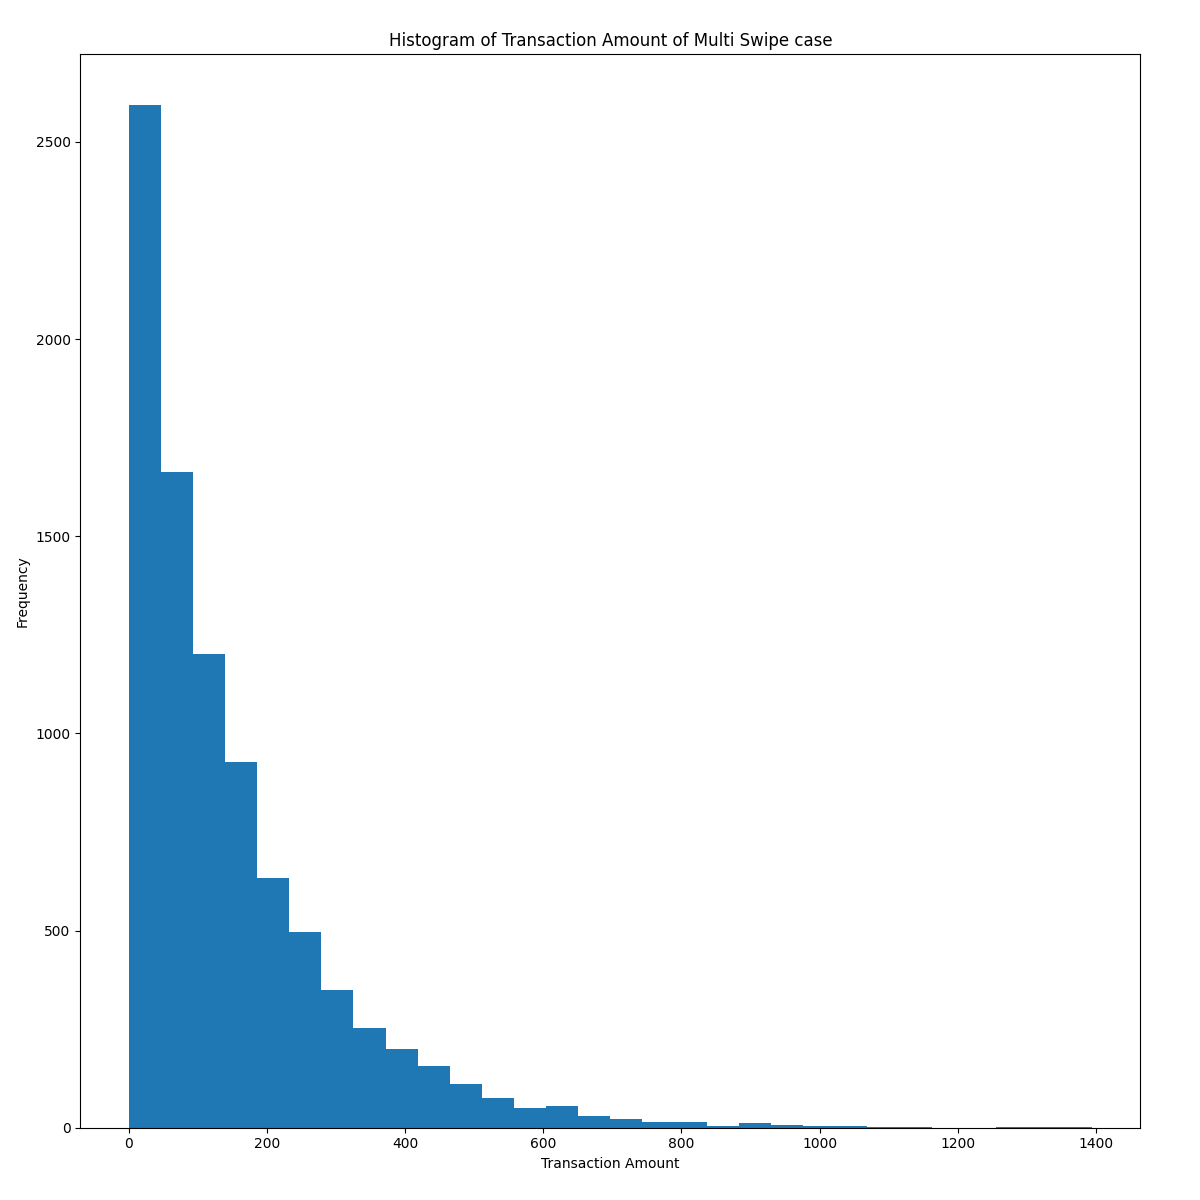

In [138]:
# Histogram of Transaction Amount of Multi Swipe case
plt.clf()
plt.hist(mSwipe['transactionAmount'], bins=30)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount of Multi Swipe case')
plt.show()
%matplot plt

In [139]:
print('Total number of multi swipe transactions: {} '.format(len(mSwipe)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total number of multi swipe transactions: 8882

In [140]:
print('Most of the high frequency transactions are of 0.00 USD')
# After removing transactions with 0.00 amount, the number of reverse transaction is
print('Total number of multi swipe transactions of 0.00 USD: {} '.format(len(mSwipe[mSwipe['transactionAmount']==0.00])))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Most of the high frequency transactions are of 0.00 USD
Total number of multi swipe transactions of 0.00 USD: 243

In [141]:
print('Total amount of multi swipe transactions: {} USD '.format(mSwipe['transactionAmount'].sum()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total amount of multi swipe transactions: 1304345.4100000001 USD

In [142]:
print('Total sum of multi swipe and reverse transactions: {} USD'.format(mSwipe['transactionAmount'].sum() + reversal['transactionAmount'].sum()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total sum of multi swipe and reverse transactions: 4126137.9100000043 USD

In [143]:
print('Total number of multi swipe and reverse transactions: {}'.format(len(mSwipe)+len(reversal)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total number of multi swipe and reverse transactions: 29185

In [144]:
revSwipe_percentage = round(len(reversal)/cases*100, 2)
mSwipe_percentage = round(len(mSwipe)/cases*100, 2)
print('Reverse Swipe and Multi Swipe COUNT')
print('--------------------------------------------')
print('Total number of cases are {}'.format(cases))
print('Percentage of reverse swipe cases are {} %'.format(revSwipe_percentage))
print('Percentage of multi swipe cases are {} %'.format(mSwipe_percentage))
print('--------------------------------------------')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Reverse Swipe and Multi Swipe COUNT
--------------------------------------------
Total number of cases are 786351
Percentage of reverse swipe cases are 2.58 %
Percentage of multi swipe cases are 1.13 %
--------------------------------------------

# Model Design for Fraud Detection 

In [145]:
# extract month, weekday, hour, minute, and second information from transactionDateTime as features
df['month'] = df['transactionDateTime'].apply(lambda x: x.month)
df['day'] = df['transactionDateTime'].apply(lambda x: x.day)
df['weekday'] = df['transactionDateTime'].apply(lambda x: x.dayofweek)
df['hour'] = df['transactionDateTime'].apply(lambda x: x.hour)
df['minute'] = df['transactionDateTime'].apply(lambda x: x.hour)
df['seconds'] = df['transactionDateTime'].apply(lambda x: x.second)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [146]:
# Replace False with 0 and True with 1
df['matchingCVV'] = df['cardCVV'] == df['enteredCVV']

for col in ['cardPresent', 'matchingCVV', 'expirationDateKeyInMatch', 'isFraud','is_multiSwipe']:
    df[col] = df[col].replace({False: 0, True: 1})
account_number = df['accountNumber']
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   accountNumber  customerId  creditLimit  ...  minute seconds  matchingCVV
0      100088067   100088067        50000  ...      22      50            1
1      100088067   100088067        50000  ...      22      41            1
2      100088067   100088067        50000  ...      22      49            1
3      100088067   100088067        50000  ...       0      48            1
4      100088067   100088067        50000  ...      13      22            1

[5 rows x 34 columns]

In [147]:
df.shape

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(786363, 34)

In [148]:
#replace empty str with "" and then replacing NaN vals with 0
df.columns = df.columns.str.replace(' ','') 
df['posEntryMode']= df['posEntryMode'].replace('', 0)
df['posConditionCode']= df['posConditionCode'].replace('', 0)

#Replacing null values with 0
df.posEntryMode=df.posEntryMode.astype(str).astype(float).fillna(0.0)
df.posConditionCode=df.posConditionCode.astype(str).astype(float).fillna(0.0)
df.is_multiSwipe = df.is_multiSwipe.fillna(0.0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [149]:
# drop columns that are not required for model design
df.drop(['cardLast4Digits',
         'merchantName',
         'acqCountry',
         'merchantCountryCode',
         'merchantCategoryCode',
         'accountOpenDate',
         'transactionType',
         'transactionDateTime',
         'currentExpDate',
         'customerId',
         'dateOfLastAddressChange',
         'enteredCVV',
         'cardCVV',
         ], inplace=True, axis=1)
df.isnull().sum()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

accountNumber               0
creditLimit                 0
availableMoney              0
transactionAmount           0
posEntryMode                0
posConditionCode            0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
is__ADDRESS_VERIFICATION    0
is__PURCHASE                0
is__REVERSAL                0
is_multiSwipe               0
month                       0
day                         0
weekday                     0
hour                        0
minute                      0
seconds                     0
matchingCVV                 0
dtype: int64

In [150]:
df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int32  
 1   creditLimit               786363 non-null  int32  
 2   availableMoney            786363 non-null  float64
 3   transactionAmount         786363 non-null  float64
 4   posEntryMode              786363 non-null  float64
 5   posConditionCode          786363 non-null  float64
 6   currentBalance            786363 non-null  float64
 7   cardPresent               786363 non-null  int64  
 8   expirationDateKeyInMatch  786363 non-null  int64  
 9   isFraud                   786363 non-null  int64  
 10  is__ADDRESS_VERIFICATION  786363 non-null  int8   
 11  is__PURCHASE              786363 non-null  int8   
 12  is__REVERSAL              786363 non-null  int8   
 13  is_multiSwipe             786363 non-null  f

# Class imbalance problem

Since the dataset is highly imbalanced, with a vast majority of transactions being non-fraudulent (class 0) and a relatively small number of transactions being fraudulent (class 1). This indicates that the dataset has a class imbalance problem, which may affect the performance of a model trained on this dataset.

One of the solution is to implement under sampling. Undersampling the majority class (non-fraud cases) is a straightforward method to adjust imbalanced data. In this process, We take random draws from the non-fraud observations, to match the occurences of fraud observations.

Another approach is oversampling the minority class (fraud cases). Here, we take random draws from the fraud cases and copy those observations to increase the amount of fraud samples.

Both methods lead to having a balance between fraud and non-fraud cases.

##### Drawbacks
1. with random undersampling, a lot of data is thrown away.
2. with oversampling, the model will be trained on a lot of duplicates.

### Undersampling

In [151]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [152]:
spark_df = spark.createDataFrame(df)

# Calculate the count of each class in the 'isFraud' column
fraud_count = spark_df.groupBy('isFraud').count()

# find the minority class value with the smallest count
minority_class = fraud_count.orderBy(col('count')).limit(1).select('isFraud').collect()[0]['isFraud']

# Calculate the count of the minority class
minority_count = fraud_count.filter(col('isFraud') == minority_class).collect()[0]['count']

# Calculate the majority class count to match with the minority class count
majority_count = fraud_count.filter(col('isFraud') != minority_class).collect()[0]['count']

# Calculate the fraction needed for sampling the majority class to match minority class
fraction = minority_count / majority_count

# Sample the majority class to balance the classes
sampled_majority = spark_df.filter(col('isFraud') != minority_class).sample(fraction)

# Sample the minority class to balance the classes
sampled_minority = spark_df.filter(col('isFraud') == minority_class)

# Union the sampled majority class with the minority class
new_df = sampled_majority.union(sampled_minority)

# Split the new DataFrame back into features 'new_x' and 'new_y' (isFraud column)
new_x = new_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [153]:
# Find the number of rows (observations) in 'new_x'
num_rows = new_x.count()

# Find the number of columns (features) in 'new_x'
num_columns = len(new_x.columns)

# Print the shape of 'new_x'
print("Shape of new_x: {} rows, {} columns".format(num_rows, num_columns))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Shape of new_x: 24835 rows, 21 columns

In [154]:
print("Shape of data before under-sampling:", df.shape)

print("Shape of data after under-sampling:: ({}, {})".format(num_rows, num_columns))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Shape of data before under-sampling: (786363, 21)
Shape of data after under-sampling:: (24835, 21)

## CorelationMatrix

In [179]:
import numpy as np
import pandas as pd
import pyspark.ml.stat as st
import pyspark.ml.feature as feat

features_and_label = feat.VectorAssembler(
    inputCols=list(new_df.columns)
    , outputCol='features'
)

corr = st.Correlation.corr(
    features_and_label.transform(new_df), 
    'features', 
    'pearson'
)

print(str(corr.collect()[0][0]))
corr_pd = corr.toPandas()
output_np = np.array(corr_pd.iloc[0, 0].values).reshape(
    (corr_pd.iloc[0, 0].numRows, corr_pd.iloc[0, 0].numCols))

corr_pd = pd.DataFrame(output_np, columns=new_df.columns)
corr_pd.index = new_df.columns
corr_pd = ps.from_pandas(corr_pd)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DenseMatrix([[ 1.00000000e+00,  1.55054650e-01,  7.50702335e-02,
              -9.17406168e-03, -3.80977559e-03, -1.84066861e-03,
               1.72151626e-01,  5.11829272e-03,  4.75308771e-03,
              -7.53661114e-03,  7.23617227e-03, -2.05699774e-03,
              -2.76352353e-03, -4.09441765e-03, -3.23717907e-04,
              -5.03397029e-03, -4.72259055e-03,  1.60640531e-03,
               1.60640531e-03, -9.55932701e-03,  1.29862550e-02],
             [ 1.55054650e-01,  1.00000000e+00,  8.23264543e-01,
               8.14672901e-03, -4.80272920e-03, -4.05934396e-03,
               6.63104229e-01, -2.43062268e-02,  2.41022002e-03,
               1.11618945e-02, -6.44146557e-03,  1.69389119e-03,
               3.84656319e-03, -1.87220603e-03, -5.49140372e-03,
               2.09006260e-03, -1.77671943e-03, -2.42915996e-03,
              -2.42915996e-03, -9.54341553e-03, -2.20967785e-03],
             [ 7.50702335e-02,  8.23264543e-01,  1.00000000e+00,
               9.328558

In [180]:
# checking correlation btween dependent and independent variables

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation


spark = SparkSession.builder.appName("CorrelationCheck").getOrCreate()

# Selecting the relevant columns for checking correlation
selected_columns = ['creditLimit', 'availableMoney', 'transactionAmount', 'posEntryMode',
                    'posConditionCode', 'currentBalance', 'cardPresent', 'expirationDateKeyInMatch',
                    'is__ADDRESS_VERIFICATION', 'is__PURCHASE', 'is__REVERSAL', 'is_multiSwipe',
                    'month', 'day', 'weekday', 'hour', 'minute', 'seconds', 'matchingCVV', 'isFraud']
label_column = "isFraud"

# Creating a new DataFrame with the selected columns
selected_data_df = new_df.select(selected_columns + [label_column])

# Create a VectorAssembler to combine the features into a single vector column
feature_columns = selected_columns
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Transform the data by combining the selected features into the "features" column
selected_data_df = assembler.transform(selected_data_df)

# Calculate the correlation matrix between label column and selected features
correlation_matrix = Correlation.corr(selected_data_df, "features").head()
corr_array = correlation_matrix[0].toArray()

# Extract correlation values of the label column with each feature
label_corr_values = corr_array[-1, :-1]

# Create a dictionary to store the correlation values with their corresponding feature names
correlation_dict = dict(zip(feature_columns, label_corr_values))

# Print correlation values
for feature, correlation in correlation_dict.items():
    print(f"Correlation between '{label_column}' and '{feature}': {correlation:.4f}")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Correlation between 'isFraud' and 'creditLimit': 0.0112
Correlation between 'isFraud' and 'availableMoney': -0.0079
Correlation between 'isFraud' and 'transactionAmount': 0.2470
Correlation between 'isFraud' and 'posEntryMode': 0.0322
Correlation between 'isFraud' and 'posConditionCode': 0.0349
Correlation between 'isFraud' and 'currentBalance': 0.0300
Correlation between 'isFraud' and 'cardPresent': -0.1873
Correlation between 'isFraud' and 'expirationDateKeyInMatch': -0.0097
Correlation between 'isFraud' and 'is__ADDRESS_VERIFICATION': -0.0660
Correlation between 'isFraud' and 'is__PURCHASE': 0.0359
Correlation between 'isFraud' and 'is__REVERSAL': 0.0073
Correlation between 'isFraud' and 'is_multiSwipe': 0.0085
Correlation between 'isFraud' and 'month': -0.0207
Correlation between 'isFraud' and 'day': -0.0056
Correlation between 'isFraud' and 'weekday': -0.0083
Correlation between 'isFraud' and 'hour': 0.0020
Correlation between 'isFraud' and 'minute': 0.0020
Correlation between 'is

**Explaination:** <br>
    'transactionAmount' has a moderate positive correlation (0.2470) with 'isFraud,' indicating that fraudulent transactions tend to have higher transaction amounts compared to non-fraudulent transactions.<br>

'cardPresent' has a moderate negative correlation (-0.1873) with 'isFraud,' suggesting that fraudulent transactions are more likely to occur when the physical card is not present during the transaction.<br>

'is__ADDRESS_VERIFICATION' has a moderate negative correlation (-0.0660) with 'isFraud,' indicating that address verification might be associated with lower occurrences of fraud.<br>

'posEntryMode' and 'posConditionCode' have weak positive correlations (0.0322 and 0.0349, respectively) with 'isFraud,' suggesting certain point of sale entry modes and condition codes might be slightly associated with higher occurrences of fraud.<br>

'matchingCVV' has a moderate negative correlation (-0.0357) with 'isFraud,' suggesting that matching CVVs might be associated with lower occurrences of fraud.<br>

The correlation analysis suggests that 'transactionAmount' and 'cardPresent' are the most important factors associated with fraud. Higher transaction amounts and transactions without the physical card present are more likely to be fraudulent. Additionally, address verification, specific point of sale entry modes and condition codes, and matching CVVs show some correlation with lower fraud occurrences. However, it's crucial to perform further analysis and consider other factors before making any definitive conclusions about fraud patterns.

### Data transformation

We did not creat dummy variables for all categorical column. We only considered "Revaesal" transaction from "PurchaseType" as one dummy variable.

We also think we don't need to normalize your data.

# Machine Learning Modeling

# Logistic Regression

In [181]:
import pyspark.sql.functions as F
import pyspark.ml.feature as feat
from pyspark.ml import Pipeline
import pyspark.ml.classification as cl
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [182]:
#split into train and test sets
fraud_train, fraud_test = (
    new_df.randomSplit([0.8, 0.2], seed = 123)
)

#convert all features to vector except for last column
vectorAssembler = feat.VectorAssembler(
    inputCols=['creditLimit', 'availableMoney', 'transactionAmount', 'posEntryMode',
                    'posConditionCode', 'currentBalance', 'cardPresent', 'expirationDateKeyInMatch',
                    'is__ADDRESS_VERIFICATION', 'is__PURCHASE', 'is__REVERSAL', 'is_multiSwipe',
                    'month', 'day', 'weekday', 'hour', 'minute', 'seconds', 'matchingCVV']
    , outputCol='features'
)

#select top 10 predictors
selector = feat.UnivariateFeatureSelector(
    labelCol='isFraud'
    , outputCol='selected'
    , selectionMode = 'numTopFeatures'
    ).setFeatureType("continuous"
    ).setLabelType("continuous"
    ).setSelectionThreshold(10)

#create a multinomial regression object
logReg_obj = cl.LogisticRegression(
    labelCol='isFraud'
    , featuresCol=selector.getOutputCol()
    , regParam=0.01
    , elasticNetParam=1.0
    , family='multinomial'
)

#create pipeline of 1)vector, 2)chisquare selector, 3)logistic regression
pipeline = Pipeline(
    stages=[
        vectorAssembler
        , selector
        , logReg_obj
    ])
#train the model
pModel = pipeline.fit(fraud_train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [183]:
import pyspark.ml.evaluation as ev

# Apply the model to the test set
logReg_model = (
    pModel
    .transform(fraud_test)
)

results_logReg = logReg_model.select('isFraud', 'probability', 'prediction')

# Initialize the evaluator
evaluator = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction',
    labelCol='isFraud'
)

# Evaluate performance of the multinomial model (7 classes)

# F-1 score
f1_score = evaluator.evaluate(results_logReg)

# Weighted precision
weighted_precision = evaluator.evaluate(results_logReg, {evaluator.metricName: 'weightedPrecision'})

# Recall for class 1
recall_class_1 = evaluator.evaluate(results_logReg, {evaluator.metricName: 'recallByLabel', evaluator.metricLabel: 1})

# Accuracy
accuracy = evaluator.evaluate(results_logReg, {evaluator.metricName: 'accuracy'})

(f1_score, weighted_precision, recall_class_1, accuracy)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(0.6519147960851723, 0.6522561804788469, 0.6289537712895377, 0.652112676056338)

In [184]:
from pyspark.mllib.evaluation import MulticlassMetrics
#Get the confusion matrix
predictionAndLabels = results_logReg.select('prediction', 'isFraud').rdd.map(lambda row: (row.prediction, float(row.isFraud)))
metrics = MulticlassMetrics(predictionAndLabels)

# the confusion matrix
confusion_matrix = metrics.confusionMatrix().toArray()

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Confusion Matrix:
[[1690.  814.]
 [ 915. 1551.]]
/mnt/yarn/usercache/livy/appcache/application_1691080712159_0001/container_1691080712159_0001_01_000001/pyspark.zip/pyspark/sql/context.py:159: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.

In [185]:
import pandas as pd

selected_cols = ([x['name'] for x in logReg_model.schema['selected'].metadata['ml_attr']['attrs']['numeric']])

#print model coefficients
#for a binomial model use coefficients instead of coefficientMatrix
pd.set_option('display.max_columns', 10)
pd.DataFrame(pModel.stages[-1].coefficientMatrix.toArray(), columns=selected_cols).head(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   transactionAmount  posEntryMode  posConditionCode  currentBalance  \
0          -0.001378     -0.000748         -0.000836   -8.818145e-08   
1           0.001378      0.000748          0.000836    8.818145e-08   

   cardPresent  is__ADDRESS_VERIFICATION  is__PURCHASE  month  weekday  \
0     0.344493                  0.243416           0.0    0.0      0.0   
1    -0.344493                 -0.243416           0.0    0.0      0.0   

   matchingCVV  
0     0.098114  
1    -0.098114

# Random Forest

In [186]:
#same as previous, this time using Random Forest
rf_obj = cl.RandomForestClassifier(
    labelCol='isFraud'
    , featuresCol='features'
    , minInstancesPerNode=10
    , numTrees=10
)

pipeline = Pipeline(
    stages=[vectorAssembler, rf_obj]
)

pModel = pipeline.fit(fraud_train)

rf_obj_trained = (
    pModel
    .transform(fraud_test)
)
results_rf = rf_obj_trained.select('isFraud', 'probability', 'prediction')

# Initialize the evaluator
evaluator = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction',
    labelCol='isFraud'
)

# Evaluate performance of the multinomial model (7 classes)

# F-1 score
f1_score = evaluator.evaluate(results_rf)

# Weighted precision
weighted_precision = evaluator.evaluate(results_rf, {evaluator.metricName: 'weightedPrecision'})

# Recall for class 1
recall_class_1 = evaluator.evaluate(results_rf, {evaluator.metricName: 'recallByLabel', evaluator.metricLabel: 1})

# Accuracy
accuracy = evaluator.evaluate(results_rf, {evaluator.metricName: 'accuracy'})

(f1_score, weighted_precision, recall_class_1, accuracy)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(0.6586393366863684, 0.659270671309927, 0.6293592862935928, 0.6589537223340041)

In [187]:
from pyspark.mllib.evaluation import MulticlassMetrics
#Get the confusion matrix
predictionAndLabels = results_rf.select('prediction', 'isFraud').rdd.map(lambda row: (row.prediction, float(row.isFraud)))
metrics = MulticlassMetrics(predictionAndLabels)

# the confusion matrix
confusion_matrix = metrics.confusionMatrix().toArray()

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Confusion Matrix:
[[1723.  781.]
 [ 914. 1552.]]
/mnt/yarn/usercache/livy/appcache/application_1691080712159_0001/container_1691080712159_0001_01_000001/pyspark.zip/pyspark/sql/context.py:159: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.

# Hyper Parameter Logistic Regression

In [188]:
import pyspark.ml.tuning as tune

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [201]:
#split into train and test sets
fraud_train, fraud_test = (
    new_df.randomSplit([0.8, 0.2], seed = 123)
)

#convert all features to vector except for last column
vectorAssembler = feat.VectorAssembler(
    inputCols=['creditLimit', 'availableMoney', 'transactionAmount', 'posEntryMode',
                    'posConditionCode', 'currentBalance', 'cardPresent', 'expirationDateKeyInMatch',
                    'is__ADDRESS_VERIFICATION', 'is__PURCHASE', 'is__REVERSAL', 'is_multiSwipe',
                    'month', 'day', 'weekday', 'hour', 'minute', 'seconds', 'matchingCVV']
    , outputCol='features'
)


#select top 10 predictors
selector = feat.UnivariateFeatureSelector(
    labelCol='isFraud'
    , outputCol='selected'
    , selectionMode = 'numTopFeatures'
    ).setFeatureType("continuous"
    ).setLabelType("continuous"
    ).setSelectionThreshold(10)


#create a multinomial regression object
logReg_obj = cl.LogisticRegression(
    labelCol='isFraud'
    , featuresCol='features'
    , regParam=0.01
    , elasticNetParam=1.0
    , family='multinomial'
)

#use ParamGridBuilder to build a grid of parameters
logReg_grid = (
    tune.ParamGridBuilder()
    #try 4 values for regParam
    .addGrid(logReg_obj.regParam
            , [0.0, 0.01, 0.02]
        )
    #try 4 values for elasticNetParam
    .addGrid(logReg_obj.elasticNetParam
            , [0.0, 0.5, 1.0]
        )
    .build()
)

logReg_ev = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
        , labelCol='isFraud')

# use K-fold cross validation for grid search
# CrossValidator binds all of these together
# default value is k=3
cross_v = tune.CrossValidator(
    estimator=logReg_obj
    , estimatorParamMaps=logReg_grid
    , evaluator=logReg_ev
)

pipeline = Pipeline(stages=[vectorAssembler, selector])
data_trans = pipeline.fit(fraud_train)

logReg_modelTest = cross_v.fit(
    data_trans.transform(fraud_train)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [202]:
#printing Best parameters
print('Best params - regParam: {}, elasticNetParam: {}'.format(
    logReg_modelTest.bestModel._java_obj.getRegParam(),
      logReg_modelTest.bestModel._java_obj.getElasticNetParam()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Best params - regParam: 0.02, elasticNetParam: 0.5

In [203]:
# hyperparameter tuning, evaluation of a logistic regression model and sorts it based on the F1-score in descending order
import pandas as pd
tuning_results = pd.DataFrame([list(x.values()) for x in logReg_grid], columns=['regParam', 'elasticNetParam'])
tuning_results['F-1'] = logReg_modelTest.avgMetrics
tuning_results.sort_values('F-1', ascending=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   regParam  elasticNetParam       F-1
7      0.02              0.5  0.650047
5      0.01              1.0  0.649781
4      0.01              0.5  0.648725
8      0.02              1.0  0.648010
3      0.01              0.0  0.646793
0      0.00              0.0  0.646639
1      0.00              0.5  0.646639
2      0.00              1.0  0.646639
6      0.02              0.0  0.646451

In [205]:
# measure performance of best model
data_trans_test = data_trans.transform(fraud_test)
results = logReg_modelTest.transform(data_trans_test)

print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'f1'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedPrecision'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedRecall'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'accuracy'}))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.650317598052768
0.6506283003059816
0.650503018108652
0.650503018108652

In [193]:
selected_cols = ([x['name'] for x in data_trans_test.schema['selected'].metadata['ml_attr']['attrs']['numeric']])

#print model coefficients
#for a binomial model used coefficients instead of coefficientMatrix
pd.set_option('display.max_columns', 10)
pd.DataFrame(logReg_modelTest.bestModel.coefficientMatrix.toArray(), columns=selected_cols).head(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
Shape of passed values is (2, 19), indices imply (2, 10)
Traceback (most recent call last):
  File "/usr/local/lib64/python3.7/site-packages/pandas/core/frame.py", line 558, in __init__
    mgr = init_ndarray(data, index, columns, dtype=dtype, copy=copy)
  File "/usr/local/lib64/python3.7/site-packages/pandas/core/internals/construction.py", line 238, in init_ndarray
    return create_block_manager_from_blocks(block_values, [columns, index])
  File "/usr/local/lib64/python3.7/site-packages/pandas/core/internals/managers.py", line 1687, in create_block_manager_from_blocks
    raise construction_error(tot_items, blocks[0].shape[1:], axes, e)
ValueError: Shape of passed values is (2, 19), indices imply (2, 10)



In [194]:
trainingSummary = logReg_modelTest.bestModel.summary
# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))
    
accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

objectiveHistory:
0.693145445971075
0.684665206193844
0.6536869634319812
0.6533119290321946
0.6532991420111725
0.6532989036135801
0.653298901738408
0.6532989016995626
0.6532989016987747
False positive rate by label:
label 0: 0.37624359360868254
label 1: 0.31995158361912446
True positive rate by label:
label 0: 0.6800484163808755
label 1: 0.6237564063913175
Precision by label:
label 0: 0.6429525081060462
label 1: 0.6617976330099158
Recall by label:
label 0: 0.6800484163808755
label 1: 0.6237564063913175
F-measure by label:
label 0: 0.6609803921568628
label 1: 0.642214174857734
Accuracy: 0.6518499874150516
FPR: 0.3480451646428586
TPR: 0.6518499874150516
F-measure: 0.6515798067884444
Precision: 0.6523926207623969
Recall: 0.6518499874150516

# Hyper Parameter Random Forest

In [195]:
#convert all features to vector except for last column
vectorAssembler = feat.VectorAssembler(
    inputCols=['creditLimit', 'availableMoney', 'transactionAmount', 'posEntryMode',
                    'posConditionCode', 'currentBalance', 'cardPresent', 'expirationDateKeyInMatch',
                    'is__ADDRESS_VERIFICATION', 'is__PURCHASE', 'is__REVERSAL', 'is_multiSwipe',
                    'month', 'day', 'weekday', 'hour', 'minute', 'seconds', 'matchingCVV']
    , outputCol='features'
)


selector = feat.UnivariateFeatureSelector(
    labelCol='isFraud'
    , outputCol='selected'
    , selectionMode = 'numTopFeatures'
    ).setFeatureType("continuous"
    ).setLabelType("continuous"
    ).setSelectionThreshold(10) #select top 10 features


rf_obj = cl.RandomForestClassifier(
    labelCol='isFraud'
    , featuresCol='features'
    , minInstancesPerNode=10
    , numTrees=10
)
    
#use ParamGridBuilder to build a grid of parameters
rf_grid = (
    tune.ParamGridBuilder()
    #try 4 values for minInstancesPerNode
    .addGrid(rf_obj.minInstancesPerNode
            , [5, 10, 20]
        )
    #try 4 values for maxDepth
    .addGrid(rf_obj.maxDepth
            , [10, 20]
        )
    .build()
)

rf_ev = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='isFraud')

# use K-fold cross validation for grid search
# CrossValidator binds all of these together
# default value is k=3
cross_v = tune.CrossValidator(
    estimator=rf_obj
    , estimatorParamMaps=rf_grid
    , evaluator=rf_ev
)

pipeline = Pipeline(stages=[vectorAssembler, selector])
data_trans = pipeline.fit(fraud_train)

rf_modelTest = cross_v.fit(
    data_trans.transform(fraud_train)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [196]:
print('Best params - MaxDepth: {}, MinInstancesPerNode: {}'.format(
    rf_modelTest.bestModel._java_obj.getMaxDepth(),
      rf_modelTest.bestModel._java_obj.getMinInstancesPerNode()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Best params - MaxDepth: 10, MinInstancesPerNode: 10

In [197]:
# hyperparameter tuning, evaluation of a random forest model and sorts it based on the F1-score in descending order
import pandas as pd
tuning_results = pd.DataFrame([list(x.values()) for x in rf_grid], columns=['minInstancesPerNode', 'maxDepth'])
tuning_results['F-1'] = rf_modelTest.avgMetrics
tuning_results.sort_values('F-1', ascending=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   minInstancesPerNode  maxDepth       F-1
2                   10        10  0.669862
4                   20        10  0.669319
5                   20        20  0.668789
0                    5        10  0.668173
3                   10        20  0.662130
1                    5        20  0.657833

In [198]:
# measure performance of best model
data_trans_test = data_trans.transform(fraud_test)
results = rf_modelTest.transform(data_trans_test)

print(rf_ev.evaluate(results, {rf_ev.metricName: 'f1'}))
print(rf_ev.evaluate(results, {rf_ev.metricName: 'weightedPrecision'}))
print(rf_ev.evaluate(results, {rf_ev.metricName: 'weightedRecall'}))
print(rf_ev.evaluate(results, {rf_ev.metricName: 'accuracy'}))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.6693519289203984
0.669439674425077
0.6694164989939638
0.6694164989939638

# Support Vector Machine (SVM)

In [199]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.classification import LinearSVC


# Create a SparkSession
spark = SparkSession.builder.appName("SVMClassification").getOrCreate()


# Prepare the data for modeling, Select the relevant features and create a feature vector using VectorAssembler.
feature_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'posEntryMode',
                'posConditionCode', 'currentBalance', 'cardPresent', 'expirationDateKeyInMatch',
                'is__ADDRESS_VERIFICATION', 'is__PURCHASE', 'is__REVERSAL', 'is_multiSwipe',
                'month', 'day', 'weekday', 'hour', 'minute', 'seconds', 'matchingCVV']

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_assembled = assembler.transform(new_df)

# Split the data into training and testing sets
train_ratio = 0.8
test_ratio = 1 - train_ratio
train_data, test_data = df_assembled.randomSplit([train_ratio, test_ratio], seed=42)

# Build the SVM classification model
svm = LinearSVC(featuresCol='features', labelCol='isFraud', maxIter=10)

# Define a grid of hyperparameters to search through
paramGrid = ParamGridBuilder() \
    .addGrid(svm.regParam, [0.01, 0.1, 1.0]) \
    .build()

# Create a pipeline with the SVM model
pipeline = Pipeline(stages=[svm])

# Create a cross-validator to perform hyperparameter tuning
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(labelCol='isFraud'),
                          numFolds=5)

# Fit the model on the training data and find the best model
best_model = crossval.fit(train_data)

# Make predictions on the test data using the best model
predictions = best_model.transform(test_data)

#Result
print('Result of SVM Model: \n')

# Evaluate the best model
evaluator = MulticlassClassificationEvaluator(labelCol=label_column, metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
# Print the accuracy score and classification report
print(f"Accuracy Score: {accuracy:.4f}\n")

# Evaluate the best model
evaluator = BinaryClassificationEvaluator(labelCol='isFraud')
area_under_curve = evaluator.evaluate(predictions)

# Print the area under the ROC curve
print("Area Under ROC Curve: {:.4f}\n".format(area_under_curve))

# Convert predictions to RDD with (prediction, label) format for MulticlassMetrics
prediction_and_labels = predictions.select("prediction", "isFraud").rdd.map(lambda row: (row.prediction, float(row.isFraud)))

# Compute confusion matrix
metrics = MulticlassMetrics(prediction_and_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(metrics.confusionMatrix().toArray())

print('\n Classification report of SVM Model: \n')
# Compute classification report metrics
labels = [0.0, 1.0]  # fraud is labeled as 1 and non-fraud as 0
for label in labels:
    precision = metrics.precision(label)
    recall = metrics.recall(label)
    f1_score = metrics.fMeasure(label)
    support = int(prediction_and_labels.filter(lambda x: x[1] == label).count()) 
    print(f"\nClass {label} - \n Precision: {precision:.4f}, \n Recall: {recall:.4f},\n F1-score: {f1_score:.4f}, \n Support: {support}")

# Calculate and print Macro Average
macro_precision = metrics.weightedPrecision
macro_recall = metrics.weightedRecall
macro_f1_score = metrics.weightedFMeasure()
print("\nMacro Average - \n Precision: {:.4f}, \n Recall: {:.4f}, \n F1-score: {:.4f}".format(macro_precision, macro_recall, macro_f1_score))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-199:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 5196



Result of SVM Model: 

Accuracy Score: 0.6469

Area Under ROC Curve: 0.7032

Confusion Matrix:
[[1365. 1050.]
 [ 658. 1764.]]

 Classification report of SVM Model: 


Class 0.0 - 
 Precision: 0.6747, 
 Recall: 0.5652,
 F1-score: 0.6151, 
 Support: 2415

Class 1.0 - 
 Precision: 0.6269, 
 Recall: 0.7283,
 F1-score: 0.6738, 
 Support: 2422

Macro Average - 
 Precision: 0.6508, 
 Recall: 0.6469, 
 F1-score: 0.6445
/mnt/yarn/usercache/livy/appcache/application_1691080712159_0001/container_1691080712159_0001_01_000001/pyspark.zip/pyspark/sql/context.py:159: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.

# Hyper Parameter SVM

In [200]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.classification import LinearSVC


# Create a SparkSession
spark = SparkSession.builder.appName("SVMClassification").getOrCreate()


# Prepare the data for modeling, Select the relevant features and create a feature vector using VectorAssembler.
feature_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'posEntryMode',
                'posConditionCode', 'currentBalance', 'cardPresent', 'expirationDateKeyInMatch',
                'is__ADDRESS_VERIFICATION', 'is__PURCHASE', 'is__REVERSAL', 'is_multiSwipe',
                'month', 'day', 'weekday', 'hour', 'minute', 'seconds', 'matchingCVV']

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_assembled = assembler.transform(new_df)

# Split the data into training and testing sets
train_ratio = 0.8
test_ratio = 1 - train_ratio
train_data, test_data = df_assembled.randomSplit([train_ratio, test_ratio], seed=42)

# Build the SVM classification model
svm = LinearSVC(featuresCol='features', labelCol='isFraud', maxIter=10)

# Define a grid of hyperparameters to search through
paramGrid = ParamGridBuilder() \
    .addGrid(svm.regParam, [0.01, 0.1, 1.0]) \
    .build()

# Create a pipeline with the SVM model
pipeline = Pipeline(stages=[svm])

# Create a cross-validator to perform hyperparameter tuning
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(labelCol='isFraud'),
                          numFolds=5)

# Fit the model on the training data and find the best model
best_model = crossval.fit(train_data)

# Make predictions on the test data using the best model
predictions = best_model.transform(test_data)

#Result
print('Result of SVM Model: \n')

# Evaluate the best model
evaluator = MulticlassClassificationEvaluator(labelCol=label_column, metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
# Print the accuracy score and classification report
print(f"Accuracy Score: {accuracy:.4f}\n")

# Evaluate the best model
evaluator = BinaryClassificationEvaluator(labelCol='isFraud')
area_under_curve = evaluator.evaluate(predictions)

# Print the area under the ROC curve
print("Area Under ROC Curve: {:.4f}\n".format(area_under_curve))

# Convert predictions to RDD with (prediction, label) format for MulticlassMetrics
prediction_and_labels = predictions.select("prediction", "isFraud").rdd.map(lambda row: (row.prediction, float(row.isFraud)))

# Compute confusion matrix
metrics = MulticlassMetrics(prediction_and_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(metrics.confusionMatrix().toArray())

print('\n Classification report of SVM Model: \n')
# Compute classification report metrics
labels = [0.0, 1.0]  # fraud is labeled as 1 and non-fraud as 0
for label in labels:
    precision = metrics.precision(label)
    recall = metrics.recall(label)
    f1_score = metrics.fMeasure(label)
    support = int(prediction_and_labels.filter(lambda x: x[1] == label).count()) 
    print(f"\nClass {label} - \n Precision: {precision:.4f}, \n Recall: {recall:.4f},\n F1-score: {f1_score:.4f}, \n Support: {support}")

# Calculate and print Macro Average
macro_precision = metrics.weightedPrecision
macro_recall = metrics.weightedRecall
macro_f1_score = metrics.weightedFMeasure()
print("\nMacro Average - \n Precision: {:.4f}, \n Recall: {:.4f}, \n F1-score: {:.4f}".format(macro_precision, macro_recall, macro_f1_score))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Result of SVM Model: 

Accuracy Score: 0.6469

Area Under ROC Curve: 0.7032

Confusion Matrix:
[[1365. 1050.]
 [ 658. 1764.]]

 Classification report of SVM Model: 


Class 0.0 - 
 Precision: 0.6747, 
 Recall: 0.5652,
 F1-score: 0.6151, 
 Support: 2415

Class 1.0 - 
 Precision: 0.6269, 
 Recall: 0.7283,
 F1-score: 0.6738, 
 Support: 2422

Macro Average - 
 Precision: 0.6508, 
 Recall: 0.6469, 
 F1-score: 0.6445

#### Recall, also known as sensitivity, is defined as true positives relative to the sum of true positives and false negatives Fraction of predicted fraud cases out of all actual fraud cases is represented by the recall. Credit card companies want to optimize recall.

From the results, we see the best performing model is Random Forest with **F1 score** of **0.6693**, the weighted avg of **Weighted Recall** is **0.6694**, and **Weighted Precision** is **66.94%** with <br>
Max Depth: 10 <br>
MinInstancesPerNode: 10

Top 10 Features are 'TransactionAmount', 'posEntryMode', 'posConditionCode', 'currentBalance', 'cardPresent', 'is_Address_Verification', 'is_Purchase', 'month', 'weekday', and 'matchingCVV'.


We are sure the performace can be improved further.  With more time, we would like to implement other algorithms like Gradient Boosting.